In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1: MADHYA PRADESH rain - yield predictor

In [259]:
#data is in mm of rainfall
#goal is to create a montecarlo simulator of monthly rain in a chosen region 
#(let's choose Madhya Pradesh because supposedly it accounts for most of soybean production at 58% of total india)

url_1 = '../data/district_wise_rainfall_normal.csv'  # https://data.gov.in/catalog/rainfall-i
district_wise_dataset = pd.read_csv(url_1) 
url_2 = '../data/Sub_Division_IMD_2017'
subdiv_df = pd.read_csv(url_2)
district_name_mp = district_wise_dataset["STATE_UT_NAME"].unique()
district_name_mp.sort()
mp_string = district_name_mp[19]
district_wise_dataset.set_index(["STATE_UT_NAME", "DISTRICT"],inplace=True)

In [260]:
list_of_subdivs = subdiv_df['SUBDIVISION'].unique()
list_of_subdivs

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [261]:
district_wise_dataset.loc[mp_string]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
DISTRICT,,,,,,,,,,,,,,,,,
BETUL,7.5,8.5,9.3,5.9,6.4,137.0,290.6,293.4,197.5,49.4,13.4,9.9,1028.8,16.0,21.6,918.5,72.7
VIDISHA,14.0,8.2,5.1,1.4,4.4,110.3,356.2,376.0,162.5,24.0,11.9,10.8,1084.8,22.2,10.9,1005.0,46.7
BHIND,10.4,7.1,4.2,1.3,4.6,55.6,221.5,261.4,147.0,39.5,3.9,6.9,763.4,17.5,10.1,685.5,50.3
DATIA,9.1,8.5,5.0,3.4,6.6,62.2,246.0,293.0,174.6,39.8,4.1,7.9,860.2,17.6,15.0,775.8,51.8
DEWAS,7.5,4.0,3.8,1.3,6.2,127.9,311.6,330.7,179.6,34.4,13.5,10.9,1031.4,11.5,11.3,949.8,58.8
DHAR,3.3,1.0,1.4,0.8,4.1,126.4,266.3,261.5,172.6,34.8,11.1,2.8,886.1,4.3,6.3,826.8,48.7
GUNA,12.1,7.1,6.3,2.7,8.6,87.3,336.6,356.0,163.1,28.6,10.6,9.3,1028.3,19.2,17.6,943.0,48.5
GWALIOR,14.5,8.6,5.5,3.7,8.2,71.8,258.0,289.7,171.1,41.5,5.1,8.2,885.9,23.1,17.4,790.6,54.8
HOSHANGABAD,11.8,8.3,9.1,3.2,8.1,140.3,416.6,464.4,267.8,37.4,15.0,10.2,1392.2,20.1,20.4,1289.1,62.6


In [262]:
subdiv_df.set_index(['SUBDIVISION','YEAR'], inplace=True)
west_mp = subdiv_df.loc['West Madhya Pradesh']
east_mp = subdiv_df.loc['East Madhya Pradesh']
#cleaning nans
west_mp.isnull().values.any()
west_mp_annual = west_mp['ANNUAL']
east_mp_annual = east_mp['ANNUAL']
columns_to_drop = west_mp.columns[12:]
east_mp_annual.mean()


1203.0350427350427

In [263]:
#ok prune extra columns
west_mp.drop(columns=columns_to_drop, inplace=True)
east_mp.drop(columns=columns_to_drop, inplace=True)
east_mp

/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_38530/999589201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_mp.drop(columns=columns_to_drop, inplace=True)
/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_38530/999589201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_mp.drop(columns=columns_to_drop, inplace=True)


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [264]:
west_mp = west_mp.fillna(0)
west_mp.isnull().values.any()
east_mp = east_mp.fillna(0)
east_mp.isnull().values.any()
east_mp

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [265]:
east_mp.to_numpy().reshape(-1,1)
12 * len(east_mp) * 0.1
12 * len(east_mp) - (12 * len(east_mp) * 0.1)
west_mp.to_numpy().reshape(1,-1)[0]
len(east_mp.to_numpy().reshape(1,-1)[0]), len(west_mp.to_numpy().reshape(1,-1)[0])


(1404, 1404)

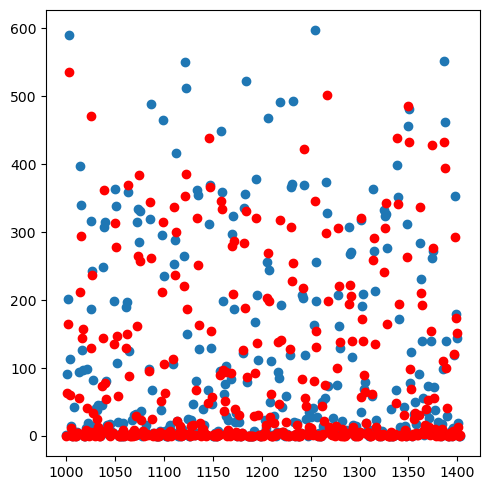

In [266]:
x_axis = np.linspace(0,1403,len(west_mp.to_numpy().reshape(1,-1)[0]))
plt.scatter(x_axis[1000:1404], east_mp.to_numpy().reshape(1,-1)[0][1000:1404])
plt.scatter(x_axis[1000:1404], west_mp.to_numpy().reshape(1,-1)[0][1000:1404], color='red')

In [267]:
covariances = np.cov(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:], rowvar = 0)
np.sqrt(covariances)

array([[120.72404889, 128.8616276 ],
       [128.8616276 , 146.54883499]])

In [268]:
np.corrcoef(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:])

array([[1.        , 0.93857949],
       [0.93857949, 1.        ]])

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in mm)')

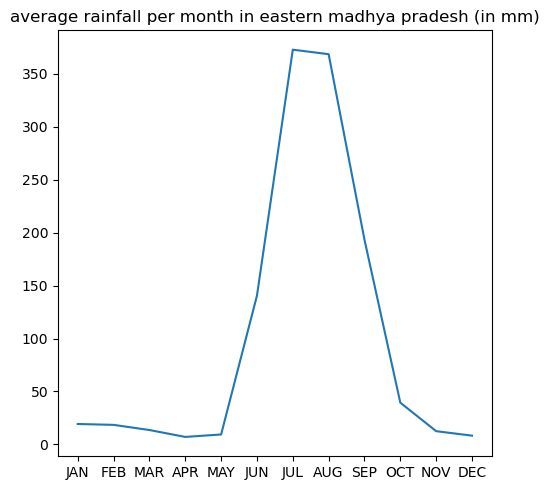

In [313]:
average_east_mp = east_mp.mean()
plt.plot(average_east_mp)
plt.title("average rainfall per month in eastern madhya pradesh (in mm)")

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in in)')

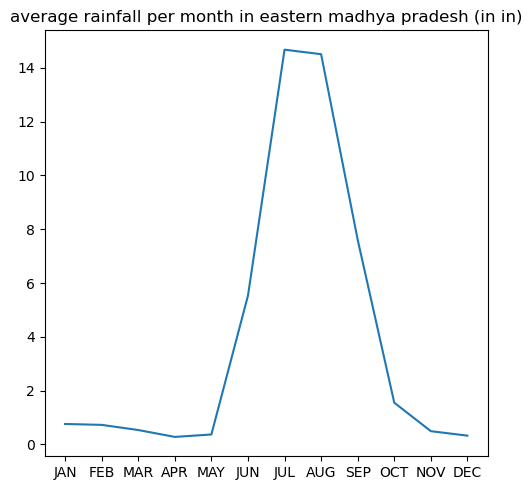

In [270]:
average_east_mp_inches = (east_mp / 25.4).mean()
plt.plot(average_east_mp_inches)
plt.title("average rainfall per month in eastern madhya pradesh (in in)")

Text(0.5, 1.0, 'average rainfall per month in western madhya pradesh (in in)')

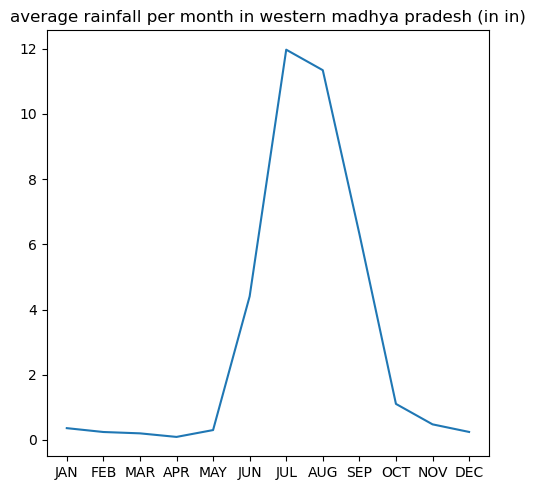

In [271]:
average_west_mp_inches = (west_mp / 25.4).mean()
plt.plot(average_west_mp_inches)
plt.title("average rainfall per month in western madhya pradesh (in in)")

In [272]:
#develop montecarlo simulator of rainfall (ie. random source of rain by random sampling dataset, maybe with weight bias towards more recent years)
# simple idea for now: normal distribution of total rainfall across all 6 months 
west_mp_monsoon = west_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
east_mp_monsoon = east_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
west_mp_monsoon['MONSOON'] = west_mp_monsoon.aggregate(np.sum, axis='columns')
east_mp_monsoon['MONSOON'] = east_mp_monsoon.aggregate(np.sum, axis='columns')
west_mp_monsoon = west_mp_monsoon['MONSOON']
east_mp_monsoon = east_mp_monsoon['MONSOON']
east_mp_monsoon


YEAR
1901    1213.5
1902     948.1
1903    1130.9
1904    1053.3
1905     823.9
         ...  
2013    1451.6
2014     804.9
2015     784.5
2016    1282.1
2017     815.4
Name: MONSOON, Length: 117, dtype: float64

In [273]:
# create normal distribution out of this dataset
east_monsoon_mean = east_mp_monsoon.mean()
east_monsoon_var = east_mp_monsoon.var()
east_monsoon_std = east_mp_monsoon.std()
east_monsoon_std, east_monsoon_std**2, east_monsoon_var

(211.3483630685731, 44668.13057176539, 44668.13057176539)

In [274]:
#set seed = 1302023
rng = np.random.default_rng(1302023)


In [275]:
random_10_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = 10)
random_10_years

array([1306.39246782, 1536.52503375, 1074.25062913, 1338.89866917,
       1371.73164214, 1328.70719344, 1372.11165065,  627.98320763,
        918.69008897,  939.75072509])

In [276]:
#now we need to develop the function from rainfall to yield
# for now, use simplistic linear regression on yield and regression as dual variables
# soybean yield from 2007 to 2022 https://www.sopa.org/statistics/soybean-production-by-state/?search_type=search_by_period&arrive=&starting_year_value=2007&ending_year_value=2022&submit=Search
soy_yield = pd.read_excel('../data/soybean_production_by_state.xltx')
soy_yield

,States,Kharif 2007,Unnamed: 2,Unnamed: 3,Kharif 2008,Unnamed: 5,Unnamed: 6,Kharif 2009,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Kharif 2020,Unnamed: 41,Unnamed: 42,Kharif 2021,Unnamed: 44,Unnamed: 45,Kharif 2022,Unnamed: 47,Unnamed: 48
0,NaN,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,...,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production
1,Rajasthan,7.635,992,7.574,8.524,860,7.332,7.094,859,6.096,...,6.56,11.002,780,8.585,9.253,761,7.046,10.344,953,9.855
2,Madhya Pradesh,48.792,1045,51.009,51.434,1010,51.94,52.985,1040,55.087,...,40.107,58.541,714,41.774,55.687,939,52.292,50.645,1051,53.248
3,Maharashtra,26.515,1230,32.617,30.684,925,28.387,30.32,982,29.773,...,39.415,40.398,1125,45.446,43.848,1102,48.325,43.446,1080,46.911
4,Andhra Pradesh,1.07,1275,1.364,1.5,1040,1.56,1.81,1050,1.901,...,1.508,1.599,1028,1.644,-,NAN,-,-,NAN,-
5,Chhattisgarh,1.1,815,0.897,1.21,875,1.059,1.29,925,1.193,...,0.539,0.776,884,0.686,0.513,910,0.467,0.42,1050,0.441
6,Gujarat,-,NAN,-,-,NAN,-,-,NAN,-,...,0.861,1.492,972,1.45,2.237,1015,2.271,2.216,1087,2.409
7,Karnataka,1.62,945,1.531,1.99,1015,2.02,2.31,1025,2.368,...,2.694,3.32,1124,3.732,3.827,1005,3.846,4.376,1005,4.398
8,Others,1.764,810,1.429,0.9,866,0.779,0.9,926,0.833,...,1.377,1.257,988,1.242,1.129,975,1.101,1.286,1056,1.358
9,Telangana,-,NAN,-,-,NAN,-,-,NAN,-,...,-,-,NAN,-,3.488,1015,3.54,1.754,1005,1.763


In [277]:
soy_yield_mp = soy_yield.set_index('States')
soy_yield_mp = soy_yield_mp.loc['Madhya Pradesh']
expected_yield = soy_yield_mp.iloc[1::3] #in kilograms per hectare
print(expected_yield.mean()) #this may be low, since online sources + solenkiatal says crop yield is around 1.5 to 2.5 tons / ha



936.8125


Text(0.5, 1.0, 'yield across 2007 -2017')

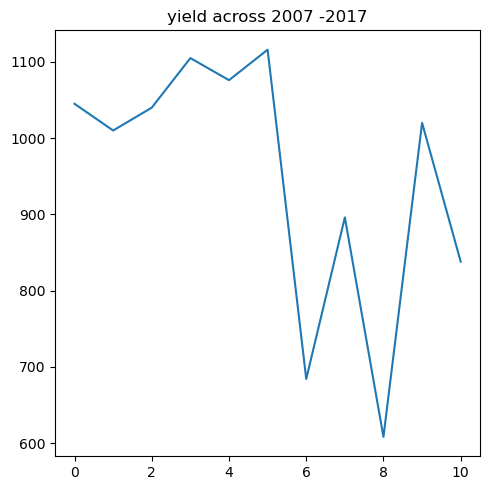

In [278]:
X = east_mp.loc[2007:2017]
Y = expected_yield.iloc[0:len(X)]
plt.plot(np.arange(len(Y)), Y)
plt.title("yield across 2007 -2017")

In [279]:
X.to_numpy()[:,5:10].shape

(11, 5)

In [317]:
#learn linear regression map from rainfall to yield
X = east_mp.loc[2007:2017]
Y = expected_yield.iloc[0:len(X)]
x_train = X.to_numpy()[:,5:10]
y_train = Y.to_numpy()

In [318]:
list(np.array([1,1,1]))

[1, 1, 1]

In [319]:
list_to = []
for row in range(len(x_train)):
    olist = list(x_train[row])
    olist.append(y_train[row])
    list_to.append(olist)
list_to

[[74.8, 207.8, 162.6, 130.1, 3.1, 1045],
 [307.6, 268.2, 270.2, 116.1, 15.5, 1010],
 [35.3, 317.6, 191.3, 208.7, 68.9, 1040],
 [58.4, 363.3, 271.9, 213.4, 23.6, 1105],
 [332.5, 323.6, 326.9, 276.5, 1.1, 1076],
 [67.8, 398.9, 351.7, 172.6, 12.7, 1116],
 [311.9, 456.2, 480.8, 78.0, 124.2, 684],
 [91.8, 283.4, 231.8, 139.6, 56.4, 896],
 [139.2, 262.2, 272.1, 71.6, 38.2, 608],
 [99.0, 552.2, 462.3, 139.6, 29.0, 1020],
 [119.0, 353.8, 179.1, 144.0, 18.8, 838]]

In [283]:
x_train.shape, y_train.shape

((11, 5), (11,))

In [284]:
from sklearn.linear_model import LinearRegression


In [285]:
lin_reg = LinearRegression().fit(x_train, y_train)
lin_reg

LinearRegression()

In [286]:
prediction_on_train = lin_reg.predict(x_train)


In [287]:
y_train, prediction_on_train

(array([1045, 1010, 1040, 1105, 1076, 1116, 684, 896, 608, 1020, 838],
       dtype=object),
 array([ 956.08273076,  852.51051195,  996.0167695 , 1100.83667938,
        1164.92647781, 1073.84952646,  664.83694881,  894.72482833,
         807.12218589, 1003.28134922,  923.81199189]))

In [288]:
y_train = list(y_train)

In [289]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     2.220
Date:                Thu, 23 Mar 2023   Prob (F-statistic):              0.201
Time:                        13:06:31   Log-Likelihood:                -65.283
No. Observations:                  11   AIC:                             142.6
Df Residuals:                       5   BIC:                             145.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        721.2020    205.467      3.510      0.0

/Users/kennethwang/opt/miniconda3/envs/crop-insurance/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [290]:
x_axis = [x for x in range(len(y_train))]

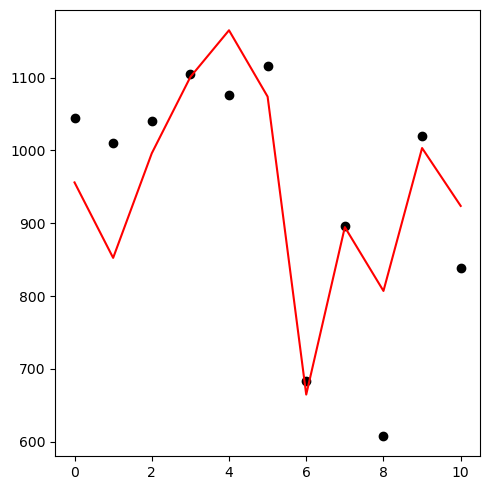

In [291]:
#overfitting because i have 12 features (from just monthly rainfall) and I have less data points than features 
fig, ax = plt.subplots()
#ax.set_color_cycle(['red', 'black', 'yellow'])
plt.scatter(x_axis, y_train, color = 'black')
plt.plot(x_axis, prediction_on_train, color ='red')

In [292]:
#doesn't seem very good, let's try quadratic
from sklearn.preprocessing import PolynomialFeatures


In [293]:
squared = np.square(x_train)
squared.shape

(11, 5)

In [294]:
quadratic = np.append(x_train, squared, axis = 1)

In [295]:
quadratic_model = LinearRegression().fit(quadratic, y_train)

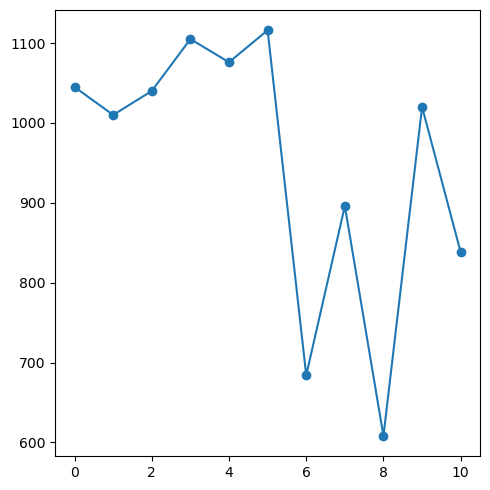

In [296]:
plt.scatter(x_axis, y_train)
plt.plot(x_axis, quadratic_model.predict(quadratic))

# 2: INDIA AT LARGE: rain-yield predictor

In [297]:
# pulling data from here on india overall yields Kumar, M., Raman, R.K. and Kumar, S., Forecasting of Soybean Yield in India through
#ARIMA Model, Int. J. Pure App. Biosci. 5(5): 1538-1546 (2017). doi: http://dx.doi.org/10.18782/2320-
#7051.5834
url_yield = '../data/yield_india_soyabean_1970-2016.csv'  # https://data.gov.in/catalog/rainfall-i
url_rain = '../data/rainfall_india_1871-2016.csv' # adding in this yield data from https://ipad.fas.usda.gov/countrysummary/Default.aspx?id=IN&crop=Soybean
yield_1970 = pd.read_csv(url_yield) 
rain_1871 = pd.read_csv(url_rain)
yield_1970.head(), rain_1871.head()

(   SI. No     Year  Area (million hec.)  Production (Million Tonnes)  \
 0       1  1970-71                 0.03                         0.01   
 1       2  1971-72                 0.03                         0.01   
 2       3  1972-73                 0.03                         0.03   
 3       4  1973-74                 0.05                         0.04   
 4       5  1974-75                 0.07                         0.05   
 
    Yield (Kg/hec)  
 0             426  
 1             426  
 2             819  
 3             829  
 4             768  ,
   IITM All_India v1871-2016 Rainfall PCPN Unnamed: 1
 0                                mm/month        NaN
 1                                    19.6        NaN
 2                                    10.7        NaN
 3                                    14.5        NaN
 4                                    33.9        NaN)

In [298]:
yield_1970

,SI. No,Year,Area (million hec.),Production (Million Tonnes),Yield (Kg/hec)
0,1,1970-71,0.03,0.01,426
1,2,1971-72,0.03,0.01,426
2,3,1972-73,0.03,0.03,819
3,4,1973-74,0.05,0.04,829
4,5,1974-75,0.07,0.05,768
5,6,1975-76,0.09,0.09,975
6,7,1976-77,0.13,0.12,988
7,8,1977-78,0.20,0.18,940
8,9,1979-80,0.50,0.28,568
9,10,1980-81,0.61,0.44,728


In [299]:
# 0 index is going to be 1871 jan, so 11th is 1871 dec, 12th is 1872 jan, 24th is 1873 jan, etc. 
# y * 12 index gives the 1871 + yth year jan 
# 1970 = 1871 + z -> z = 99 because the csv is 1 indexed (there's a dummy in 0th row)
# also there is no 1978 in the india yield data set LMAO along with 2016, so need to remove those from dataset
# add in https://ipad.fas.usda.gov/countrysummary/Default.aspx?id=IN&crop=Soybean 
z = 1970 - 1871
X = rain_1871['IITM All_India v1871-2016 Rainfall PCPN'].to_numpy()[z * 12 + 1 :]
cull_index_1 = 1978 - 1970 
cull_index_2 = 2016 - 1970
X[cull_index_1 * 12], X[cull_index_2 * 12], cull_index_1, cull_index_2
cull_list = [x + (12 * cull_index_1) for x in range(12)] + [x + (12 * cull_index_2) for x in range(12)]
Y = yield_1970
X = np.delete(X, cull_list, 0)
X = X.reshape(45, -1)
X = X.astype(float)
#X_copy = np.reshape(np.zeros(len(X) * 13), (len(X), 13))
#we are appending annual rainfall to each year, induces multicollinearit
#for row_index in range(len(X)):
#    sum_to_append = np.sum(X[row_index])
#
#    X_copy[row_index] = np.append(X[row_index], sum_to_append)
#X = X_copy
Y = Y['Yield (Kg/hec)']
Y = Y.to_numpy()
Y = Y.astype(float)

In [300]:
X.shape, Y.shape

((45, 12), (45,))

Text(0.5, 1.0, 'yield of india since 1970')

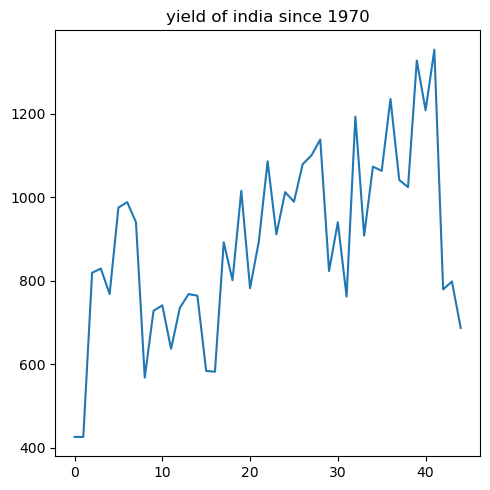

In [301]:
plt.plot(np.arange(len(Y)), Y)
plt.title("yield of india since 1970")

In [308]:
X = X[:, 5:10]

In [303]:
squared = np.square(X)
X = np.append(X, squared, axis = 1)
X.shape

(45, 10)

In [309]:
Y

array([ 426.,  426.,  819.,  829.,  768.,  975.,  988.,  940.,  568.,
        728.,  741.,  637.,  735.,  768.,  764.,  584.,  582.,  892.,
        801., 1015.,  782.,  894., 1086.,  911., 1012.,  989., 1079.,
       1100., 1138.,  823.,  940.,  762., 1193.,  908., 1073., 1063.,
       1235., 1041., 1024., 1327., 1208., 1353.,  779.,  798.,  687.])

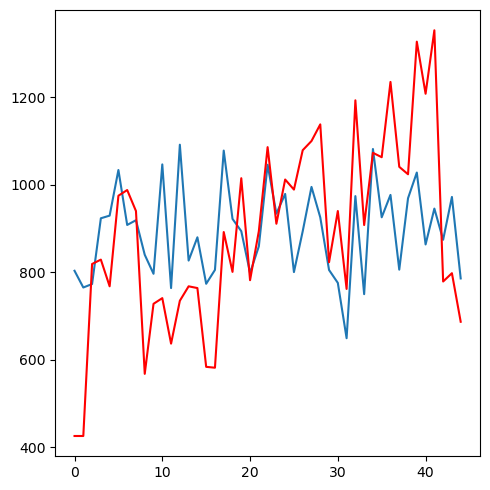

In [310]:
# nah lets not split into train and test, just run it 
lin_reg_india = LinearRegression().fit(X, Y)
y_predict = lin_reg_india.predict(X)
plt.plot([x for x in range(len(y_predict))], y_predict)
plt.plot([x for x in range(len(y_predict))], Y, color='red')

In [311]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.354
Date:                Thu, 23 Mar 2023   Prob (F-statistic):             0.0584
Time:                        13:06:52   Log-Likelihood:                -299.59
No. Observations:                  45   AIC:                             611.2
Df Residuals:                      39   BIC:                             622.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        693.3366    167.109      4.149      0.0

# 3: Multivariate Rain Distribution Generator

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (10,).

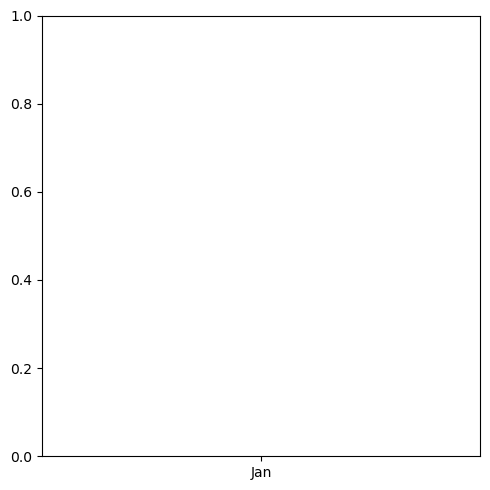

In [307]:
#create a multivariate rain distribution 
def multivar_dist(input_data):
    multivar_cov = np.cov(input_data.T)
    multivar_mean = np.mean(input_data.T, axis = 1)
    return multivar_cov, multivar_mean
    #np.random.multivariate_normal(multivar_mean, multivar_cov)
multivar_cov = multivar_dist(X)[0]
multivar_mean = multivar_dist(X)[1]
plt.bar(np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']), multivar_mean)
plt.title('average rainfall per month (mm per all of india)')

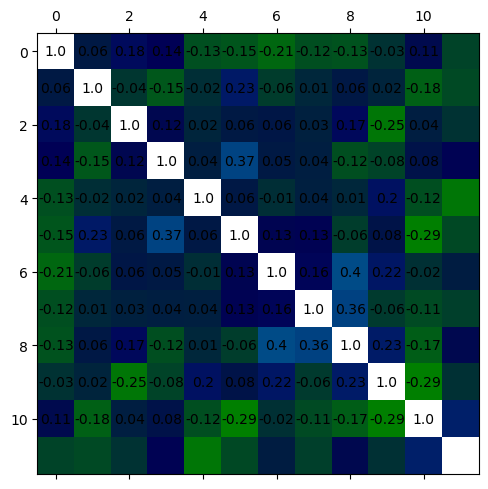

In [ ]:
multivar_corr_coef = np.corrcoef(X.T)
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
min_val, max_val = 0, 11
ax.matshow(multivar_corr_coef, cmap='ocean')

for i in range(max_val):
   for j in range(max_val):
      c = round(multivar_corr_coef[j, i], 2)
      ax.text(i, j, str(c), va='center', ha='center')

plt.show()

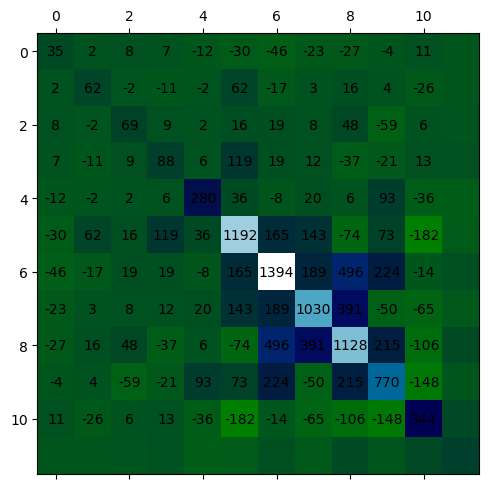

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
min_val, max_val = 0, 11
ax.matshow(multivar_cov, cmap='ocean')

for i in range(max_val):
   for j in range(max_val):
      c = int(multivar_cov[j, i])
      ax.text(i, j, str(c), va='center', ha='center')

plt.show()

In [ ]:
random_years = rng.multivariate_normal(multivar_mean, multivar_cov, size = (1, 1))
random_years

array([[[ 22.48996598,   1.80915591,   6.2243226 ,  25.54050522,
          35.64552416, 120.90077759, 224.3955258 , 236.76884821,
         213.32478566,  74.2244703 ,  46.50189392,  21.93551271]]])

# 4: Yield to Cash Function

In [ ]:
# we need to develop the map from yield to cash
#data from marketing study done (2014 Solenkiatal)
# 2,195.00 2,258.00 2,290.00 2,241.00 in rupees per quintal received by the farmer
# but also 69,500.00 in returns, with costs of 32,071.44, so net income around 37,428.56
returns = 66080.00
yields = 20.65 
revenue_per_quintal = returns / yields
fixed_cost = 6251.75
variable_cost = 25711.87 - 901.43 # removed family cost as its not a direct cash cost
total_cost_per_hectare = fixed_cost + variable_cost
total_cost_per_hectare, revenue_per_quintal # 1 quintal = 100 kg of crops
def yield_to_cash_func(predicted_yield, rev_per_q = revenue_per_quintal, total_cost = total_cost_per_hectare): 
    return predicted_yield / 100 * revenue_per_quintal - total_cost

# 5: Monte Carlo Insurance Simulators

# 5a: No Policy Simulator

In [ ]:
#calculate cumulative cash
def cash_accumulation(cash_each_year):
    return_list = []
    for i in range(len(cash_each_year)):
        if i == 0: 
            return_list.append(cash_each_year[i])
        else: 
            return_list.append(cash_each_year[i] + return_list[i-1])
    return return_list

In [ ]:
#monte carlo from the distribution of rain years 
#now create simulation by randomly drawing from rainfall distribution, per hectare
def simulate_no_policy(n_trials, n_years, yield_predictor, yield_to_cash = yield_to_cash_func,
                         multivar_mean = multivar_mean, multivar_cov = multivar_cov, seed=98765):
    rng = np.random.default_rng(seed)
    rain_trials_years = rng.multivariate_normal(multivar_mean, multivar_cov, size = (n_trials, n_years))

    profit_n_trials = []
    cash_each_year = []
    yield_n_trials = []
    for i in range(n_trials):
        trial_i = rain_trials_years[i]

        yield_i = yield_predictor.predict(trial_i)

        yield_n_trials.append(yield_i)
        cash_change = yield_to_cash(yield_i)

        cash_each_year.append(cash_change)
        profit_n_trials.append(np.sum(cash_change))
    return profit_n_trials, yield_n_trials, rain_trials_years, cash_each_year
no_policy_output = simulate_no_policy(100, 10, lin_reg_india)
# single hectare
# under these assumptions, insurance less always results in a loss in the long run 
no_policy_total_profit, no_policy_yield, no_policy_rain, no_policy_cash = no_policy_output[0], no_policy_output[1], no_policy_output[2], no_policy_output[3]
print(np.mean(no_policy_total_profit))
#plt.plot(no_policy_profit)
len(no_policy_cash[0])
len(no_policy_total_profit)

-25525.02712033649


100

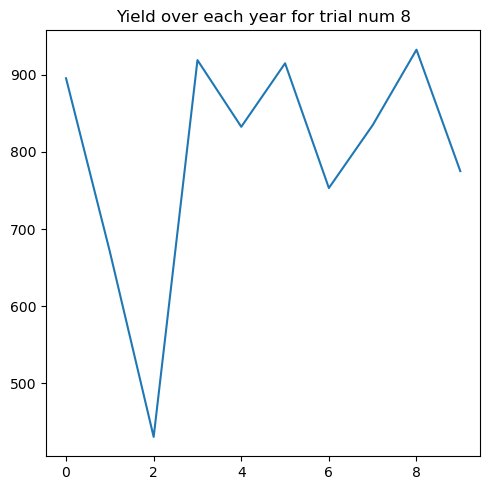

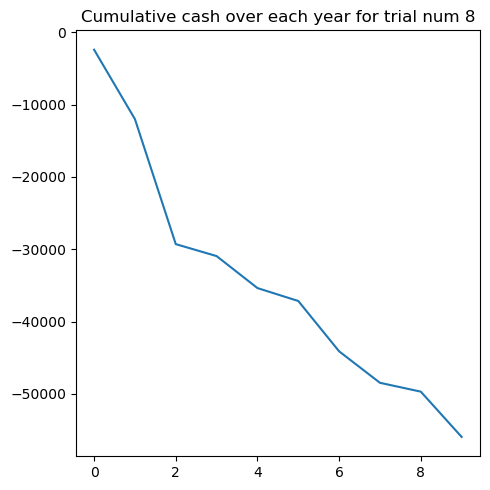

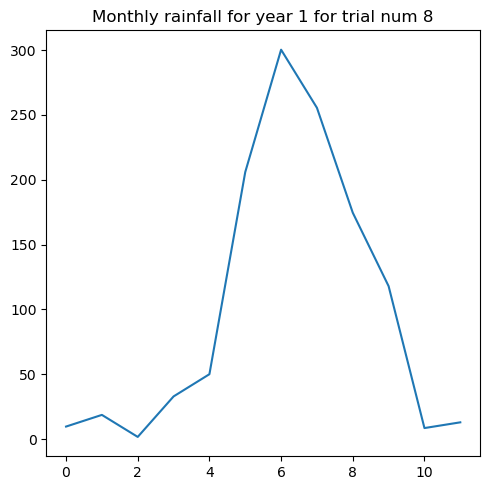

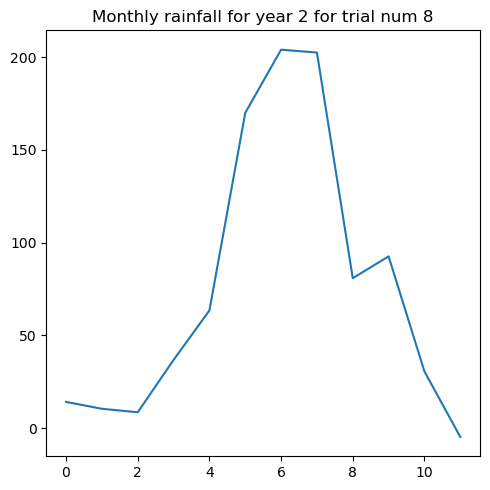

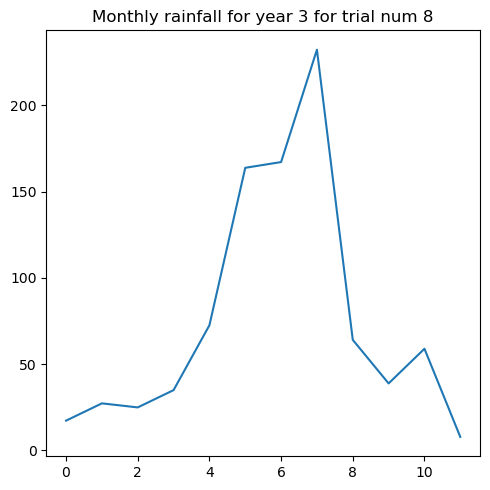

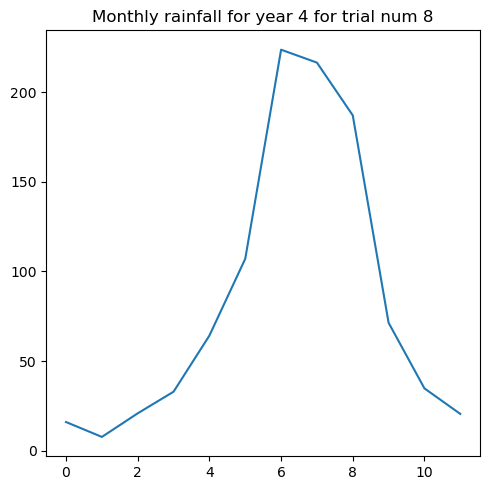

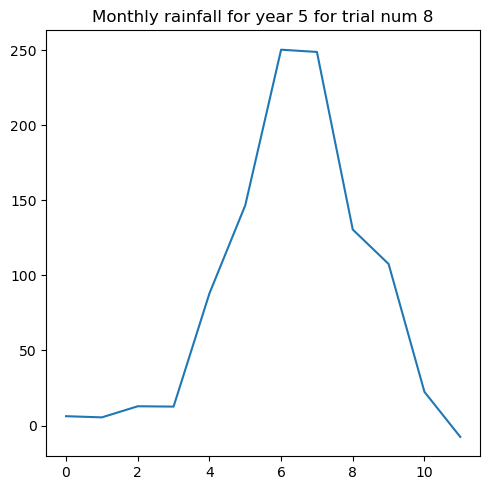

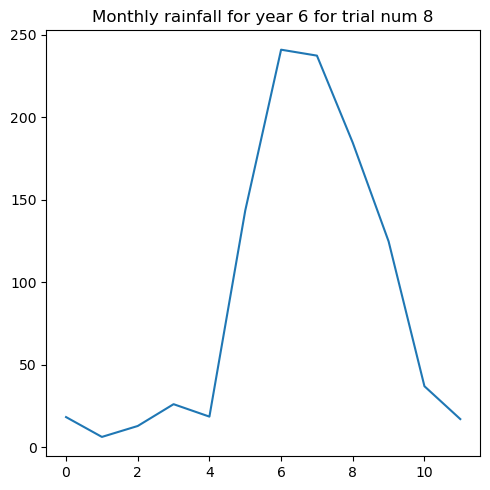

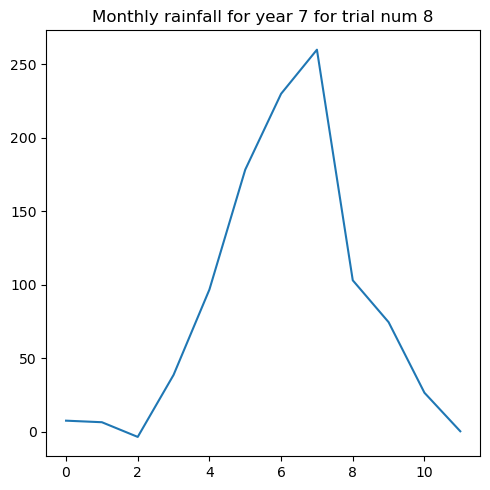

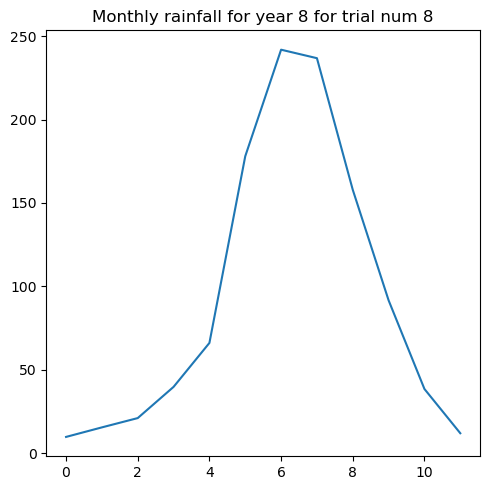

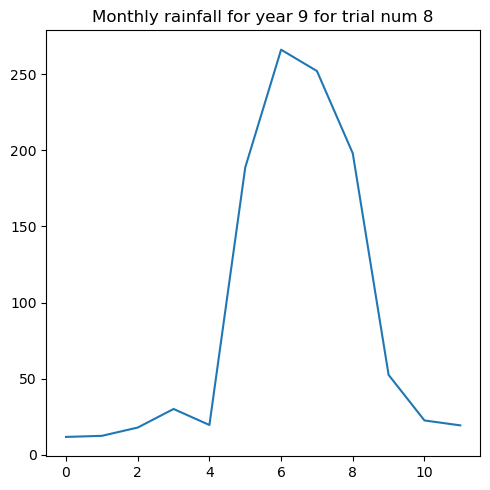

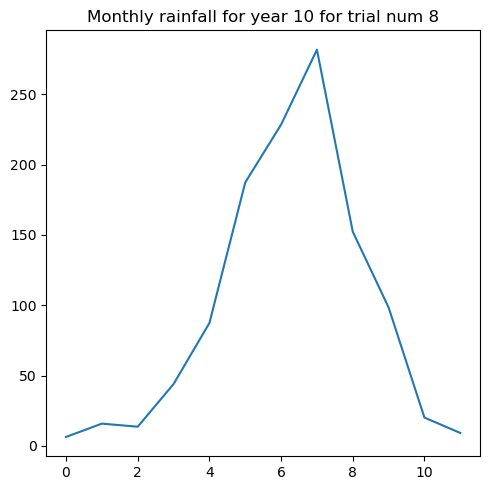

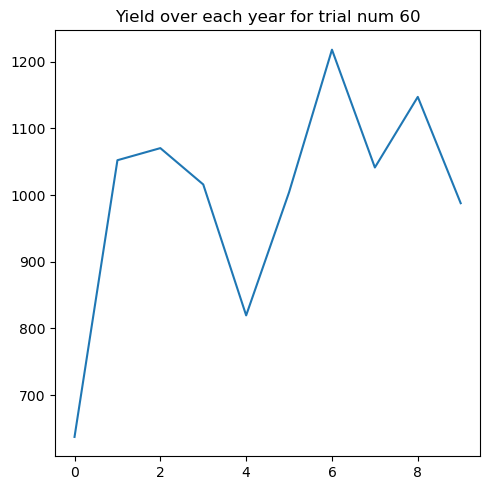

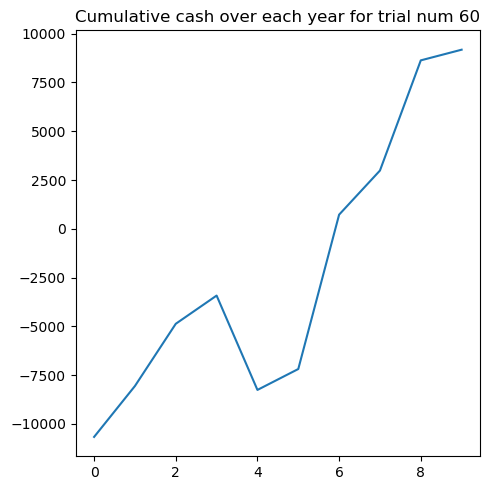

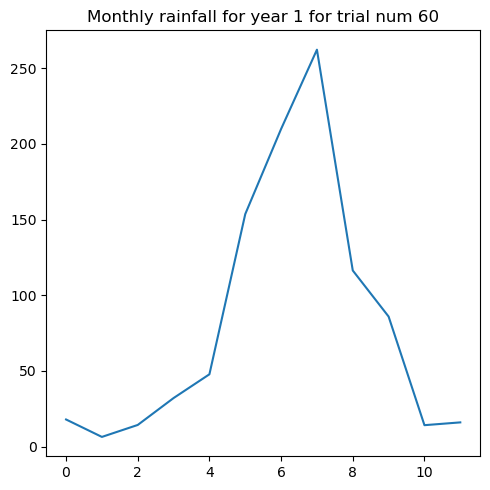

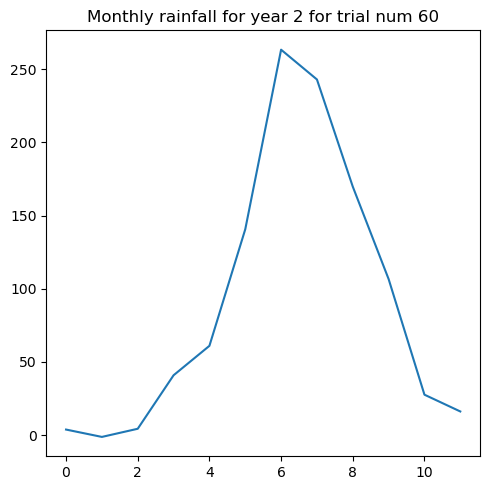

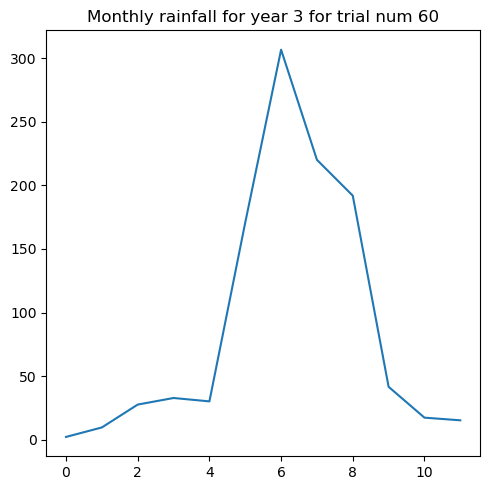

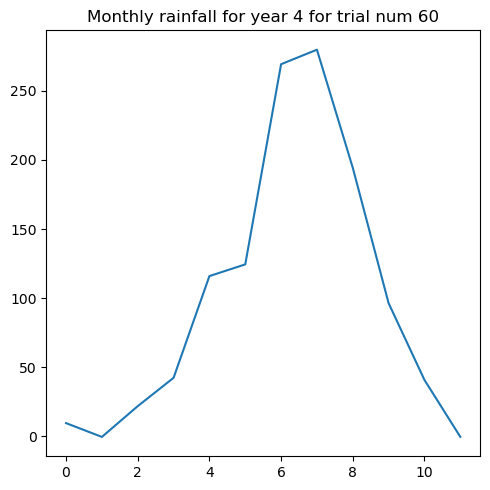

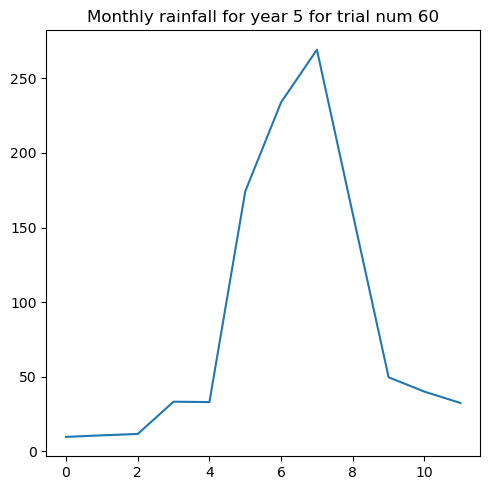

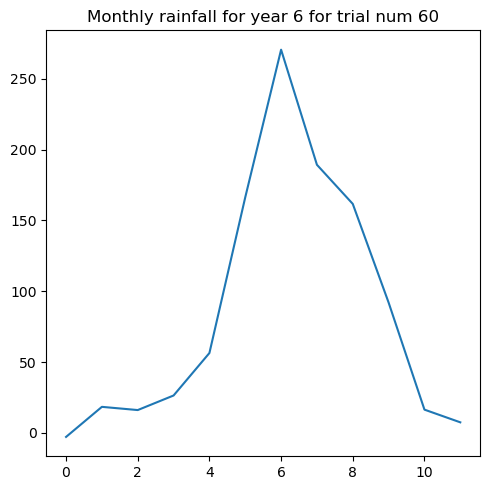

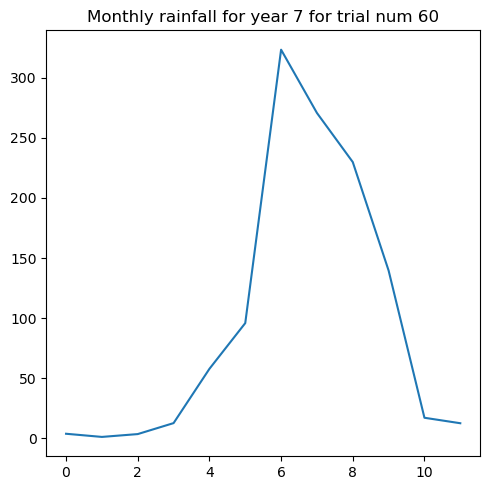

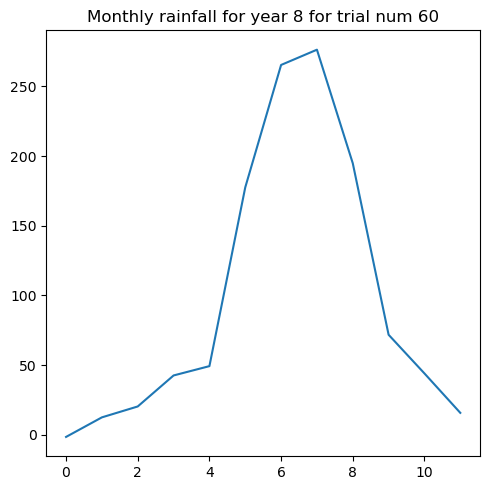

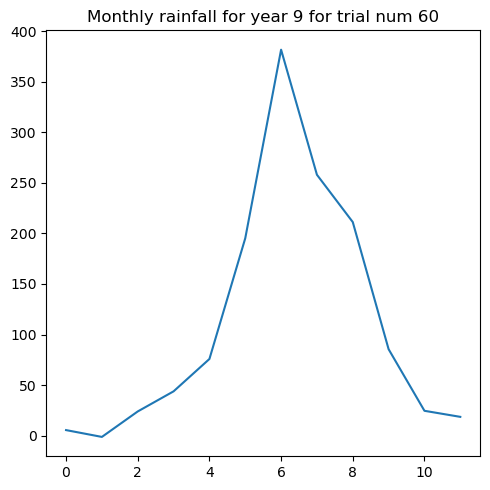

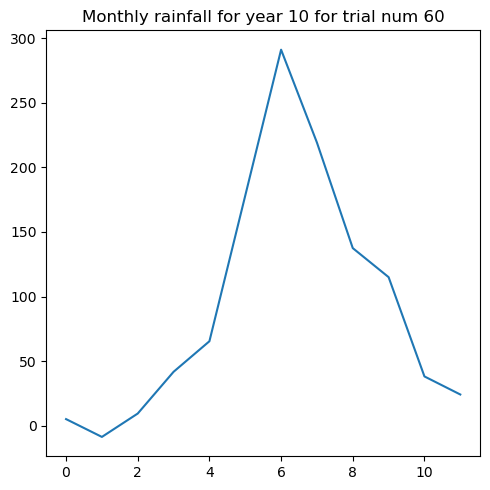

('Total Profit for trial_num 8: -25525.02712033649',
 'Total Profit for trial_num 60: -25525.02712033649')

In [ ]:
# plotting of simulation outputs
def plot_summary_trial_no_policy(sim_out, trial_num = 0): 
    profit, yields, rain, cash = sim_out[0], sim_out[1], sim_out[2], sim_out[3]
    #plot yields
    plt.figure()
    plt.title("Yield over each year for trial num " + str(trial_num))
    plt.plot(yields[trial_num])
    #plot cash
    plt.figure()
    plt.title("Cumulative cash over each year for trial num " + str(trial_num))
    plt.plot(cash_accumulation(cash[trial_num]))
    #plot monthly rainfall per year
    for _ in range(len(rain[trial_num])):
        plt.figure(str(_))
        plt.title("Monthly rainfall for year " + str(_ + 1) + " for trial num " + str(trial_num))
        plt.plot(rain[trial_num][_])
    plt.show()
    return "Total Profit for trial_num " + str(trial_num) + ": " + str(np.mean(profit))
plot_summary_trial_no_policy(no_policy_output, 8), plot_summary_trial_no_policy(no_policy_output, 60)



# 5b. General Insurance Policy Simulator

In [ ]:
#monte carlo from the distribution of rain years 
#now create simulation by randomly drawing from rainfall distribution, per hectare

#Outputs: 
# Total farmer profit for a trial, the yields, the rains, the cash_from_yield, total_farmer_cash, insurance_company_cash, number_of_payouts
# n_trials = number of trials ran  -----> CALL THIS M 
# n_years = number of years in each trial -------> CALL THIS N 
# rain_to_yield: function with input: rain, output: yield
# yield_to_cash: function with input: yield, output: cash (profit for farmer from selling items)
# rain_to_insurance: function with input: rain, output: insurance payout 
# insurance premium: amount paid for insurance coverage each year 
# starting_cash: cash that the farmer starts off with for each trial (default 0)





def insurance_sim_rain(n_trials, n_years, rain_to_yield, rain_to_insurance, insurance_premium, insurance_amount = 1, yield_to_cash = yield_to_cash_func, starting_cash = 0,
                         multivar_mean = multivar_mean, multivar_cov = multivar_cov, seed=98765):
    # generate the rainfall
    rng = np.random.default_rng(seed)
    generated_rainfall = rng.multivariate_normal(multivar_mean, multivar_cov, size = (n_trials, n_years)) # M by N matrix 


    rain_trials = [] # M by N by 12 array  
    yield_trials = [] # M by N 
    cash_from_yield_trials = [] # M by N 

    total_farmer_cash_trials = [] # M by N 
    insurance_company_cash_trials = [] # M by N array 
    num_payout = 0


    for i in range(n_trials):
        rain_i = generated_rainfall[i] # N by 12 vectors
        yield_i = rain_to_yield.predict(rain_i) # N by 1 vector
        cash_from_yield = yield_to_cash(yield_i) # N by 1 vector 

        rain_trials.append(rain_i)
        cash_from_yield_trials.append(cash_from_yield) 
        yield_trials.append(yield_i)

        # determine the insurance payment and payout, this returns a vector for each year
        # we want to keep track of the farmer under insurance and the farmer without insurance 
        #farmer with insurance:
        #   farmer will receive anything from insurance_payout
        #   farmer will pay insurance_premium (assuming there is cash)
        #   total farmer profit from insurance, ie. cash_from_insurance = insurance_payout - insurance_premium 
        #   insurance profit is the negative of farmer profit, ie. insurance_profit = - cash_from_insurance
        #   total farmer profit = cash_from_insurance + cash_from_yield
        insurance_payout = rain_to_insurance(rain_i)
        num_payout += np.sum([1 if x > 0 else 0 for x in insurance_payout])


        #cash_from_insurance: cash that farmer receives from the insurance company (negative means the amount they pay)
        cash_from_insurance = insurance_amount * (insurance_payout - insurance_premium * np.ones(len(insurance_payout))) 
        

        total_farmer_cash = cash_from_yield + cash_from_insurance
        

        total_farmer_cash_trials.append(total_farmer_cash)
        insurance_company_cash_trials.append( -1 * cash_from_insurance)
        #farmer without insurance:
        #   total farmer profit = cash_from_yield
    percentage_payout = (float(num_payout)/ float((n_trials * n_years)))


    return rain_trials, yield_trials, cash_from_yield_trials, total_farmer_cash_trials, insurance_company_cash_trials, percentage_payout, n_trials, n_years, insurance_premium, insurance_amount

In [ ]:
prem = 100
single_payout = 1000
lower_threshold = 685
# this policy is simple, if sum of rain in monsoon is < 600 mm
def single_lower_threshold(threshold = lower_threshold, payout = single_payout):
    def payout_function(rain2darray): 
        payout_list = [payout if np.sum(year[6:]) < threshold else 0 for year in rain2darray]
        return payout_list
    return payout_function
single_lower_threshold(threshold = 0.01)(np.ones([10,10,10,10]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
single_lower_threshold_output = insurance_sim_rain(100, 10, lin_reg_india, single_lower_threshold(), prem)

In [ ]:
# rain is years by trials by month, or 100 by 10 by 12

In [ ]:
np.sum(np.array(single_lower_threshold_output[0][0]).T[6:].T, axis = 1).shape

(10,)

## PLOT TRIALS INDIVIDUAL FUNCTION

Insurance Company percentage payout: 10.0%
Total Cash without Insurance: -28627.659534875947
Total Cash with Insurance: -28627.659534875947


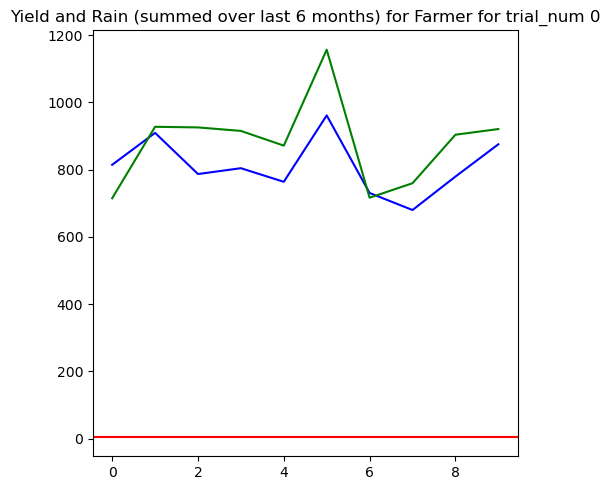

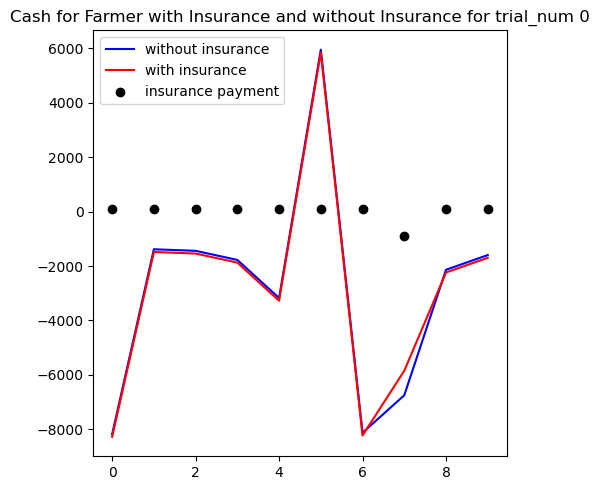

In [ ]:
# plotting of simulation outputs
def plot_trial_insurance(sim_out, threshold = lower_threshold, trial_num = 0): 
    rain_trials, yield_trials, cash_from_yield_trials, total_farmer_cash_trials, insurance_company_cash_trials, percentage_payout, n_trials, n_years, prem, insurance_amount = sim_out
    #plot yields
    #plt.figure()
    #plt.title("Yield over each year for trial num " + str(trial_num))
    #for _ in range(len(cash_yield_only)):
     #   plt.figure()
      #  plt.plot(cash_accumulation(cash_yield_only[trial_num]))
       # plt.plot(cash_accumulation(total_cash[trial_num]), color='red')
    
    #plot cash
    #plt.figure()
    #plt.title("Cumulative cash over each year for trial num " + str(trial_num))
    #plt.plot(cash_accumulation(cash_yield_only[trial_num]))
    #plot monthly rainfall per year

    plt.figure()
    #plt.title("Rain for last 6 months" + str(trial_num))
    plt.plot(np.linspace(0, n_years - 1, n_years),np.sum(np.array(rain_trials[trial_num]).T[6:].T, axis = 1), color = 'blue')
    plt.axhline(y = threshold, color = 'r', linestyle = '-')

    #for _ in range(len(rain[trial_num])):
    #    plt.figure(str(_))
    #    plt.title("Monthly rainfall for year " + str(_ + 1) + " for trial num " + str(trial_num))
    #    plt.plot(rain[trial_num][_])
    #plt.show()

    #print(total_cash[trial_num])
    plt.title("Yield and Rain (summed over last 6 months) for Farmer for trial_num " + str(trial_num))
    plt.plot(np.linspace(0, n_years - 1, n_years),yield_trials[trial_num], color = 'green')
    
    plt.figure()
    plt.title("Cash for Farmer with Insurance and without Insurance for trial_num " + str(trial_num))
    plt.plot(cash_from_yield_trials[trial_num], color='blue')
    plt.plot(total_farmer_cash_trials[trial_num], color='red') 
    plt.scatter(np.linspace(0, n_years - 1, n_years), cash_from_yield_trials[trial_num] - total_farmer_cash_trials[trial_num], color ='black')
    plt.legend(['without insurance', 'with insurance', 'insurance payment'])
    print("Insurance Company percentage payout: " + str(percentage_payout* 100) + "%")
    print("Total Cash without Insurance: " + str(np.sum(cash_from_yield_trials[trial_num])))
    print("Total Cash with Insurance: " + str(np.sum(total_farmer_cash_trials[trial_num])))

    return None
plot_trial_insurance(single_lower_threshold_output, 5)



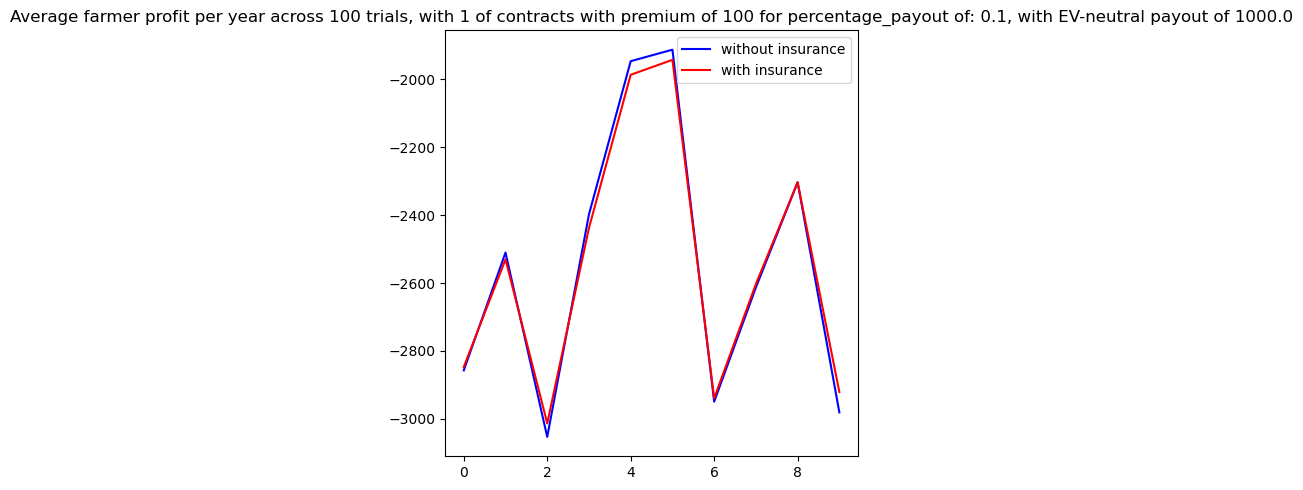

In [ ]:
# I should code up a summary plot that takes the averages over all the trials to find what happens in expectation
def plot_summary_trials(sim_out): 
    rain_trials, yield_trials, cash_from_yield_trials, total_farmer_cash_trials, insurance_company_cash_trials, percentage_payout, n_trials, n_years, prem, amount = sim_out
    # farmer story
    # average over all trials to find the 
    avg_cash_from_yield_trials = np.mean(np.array(cash_from_yield_trials), axis=0)
    avg_total_farmer_cash_trials = np.mean(np.array(total_farmer_cash_trials), axis=0)
    plt.figure()
    plt.title("Average farmer profit per year across " + str(n_trials) + " trials, with " + str(amount) + " of contracts with premium of " + str(prem) +  
               " for percentage_payout of: " + str(percentage_payout) + ", with EV-neutral payout of " + str( prem / percentage_payout))

    
    plt.plot(avg_cash_from_yield_trials, color = 'blue')
    plt.plot(avg_total_farmer_cash_trials, color = 'red')
    plt.legend(['without insurance', 'with insurance'])

    
    # insurance company story 
    # we want to see the expectation of hte insurance company 
plot_summary_trials(single_lower_threshold_output)


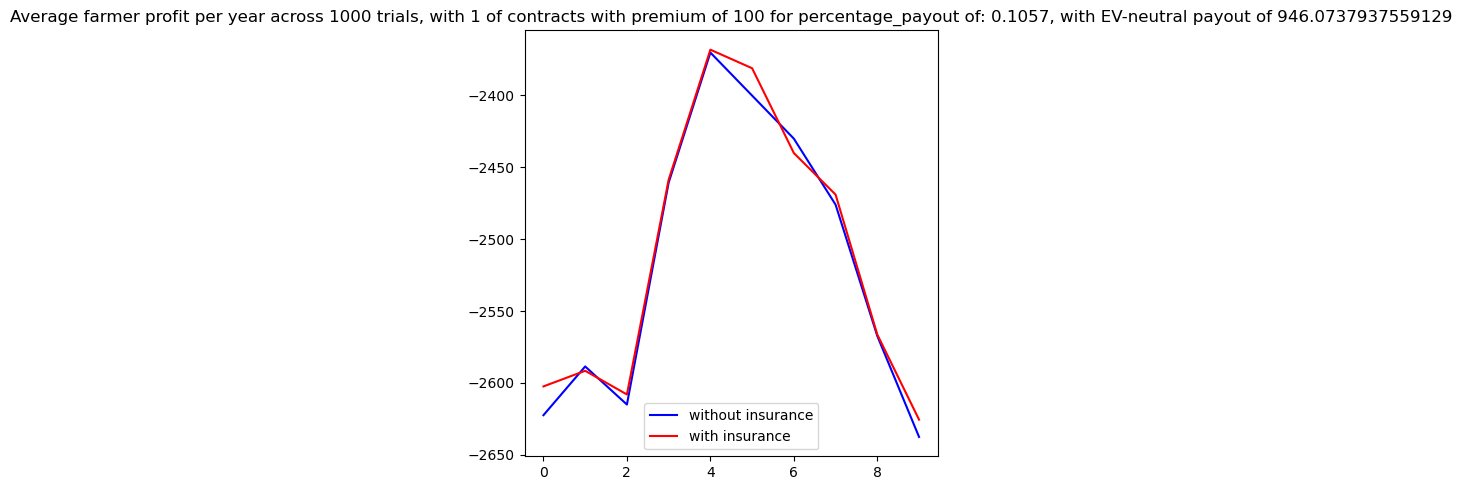

In [ ]:
single_lower_threshold_output2 = insurance_sim_rain(1000, 10, lin_reg_india, single_lower_threshold(), prem)
plot_summary_trials(single_lower_threshold_output2)


In [ ]:
prem = 100
single_payout = 1000
lower_threshold = 685
# this policy is simple, if sum of rain in monsoon is < 600 mm
def single_lower_threshold(threshold = lower_threshold, payout = single_payout):
    def payout_function(rain2darray): 
        payout_list = [payout if np.sum(year[6:]) < threshold else 0 for year in rain2darray]
        return payout_list
    return payout_function
single_lower_threshold()(np.zeros((10,12)))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

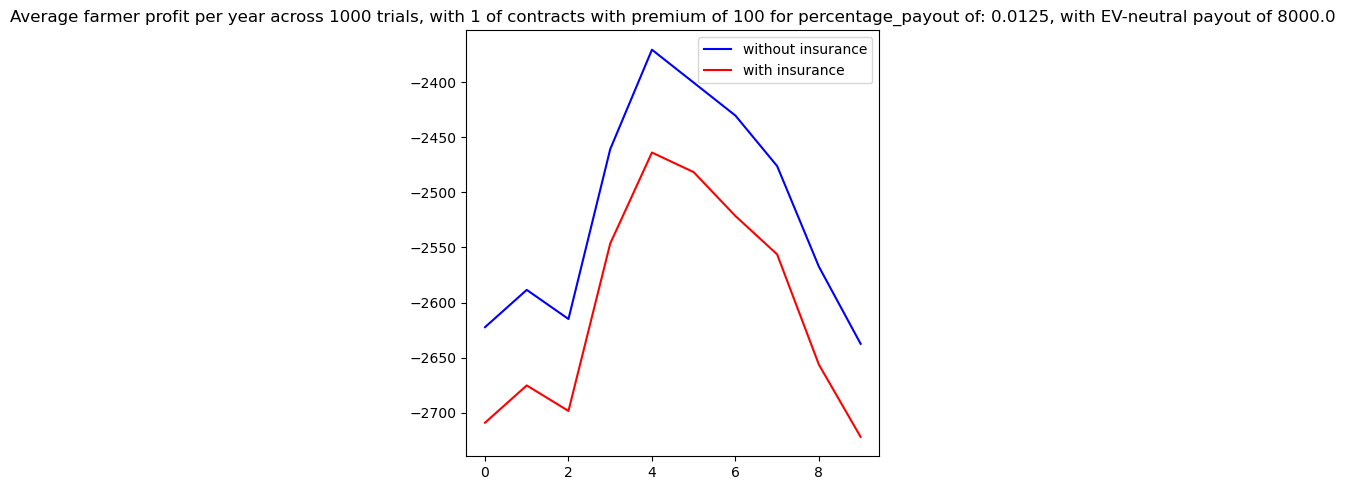

In [ ]:
single_lower_threshold_output2 = insurance_sim_rain(1000, 10, lin_reg_india, single_lower_threshold(600, 1100), insurance_premium = 100)
plot_summary_trials(single_lower_threshold_output2)


In [ ]:
# want to montecarlo the correct values for payout for insurance.
# thus, first calculate the threshold values that enable a certain percentage payout
#rain to insurance is the payout 
def percentage_payout_calculator( rain_to_insurance, n_trials = 10000, n_years = 10,
                         multivar_mean = multivar_mean, multivar_cov = multivar_cov, seed=98765):
    # generate the rainfall
    rng = np.random.default_rng(seed)
    generated_rainfall = rng.multivariate_normal(multivar_mean, multivar_cov, size = (n_trials, n_years)) # M by N matrix 
    num_payout = 0
    total_payout = 0

    for i in range(n_trials):
        rain_i = generated_rainfall[i] # N by 12 vectors

        insurance_payout = rain_to_insurance(rain_i)
        total_payout += np.sum(insurance_payout)
        num_payout += np.sum([1 if x > 0 else 0 for x in insurance_payout])
    percentage_payout = (float(num_payout)/ float((n_trials * n_years)))

    return percentage_payout, total_payout, n_trials, n_years
percentage_payout_calculator(rain_to_insurance = single_lower_threshold(threshold = 600, payout = 1000))

(0.01167, 1167000, 10000, 10)

In [ ]:
def premium_calculator(policy, threshold_values, payout = 1000):
    
    return_list = []
    for i in range(len(threshold_values)):
        perc_payout, total_payout, n_trials, n_years = percentage_payout_calculator(policy(threshold_values[i], payout))
        expected_premium = float(total_payout) / (float(n_trials * n_years))
        return_list.append(expected_premium)
    return return_list
premium_calculator(single_lower_threshold, threshold_values = np.linspace(400, 800, 21))

[0.0,
 0.01,
 0.02,
 0.05,
 0.07,
 0.27,
 0.68,
 1.53,
 3.21,
 6.06,
 11.67,
 21.21,
 36.1,
 58.64,
 91.43,
 136.67,
 195.25,
 265.35,
 348.47,
 439.9,
 534.19]

In [ ]:
prem = premium_calculator(single_lower_threshold, threshold_values = [650], payout = 1000)
sim_output = insurance_sim_rain(10000, 10, lin_reg_india, single_lower_threshold(650, 1000), insurance_premium = prem, insurance_amount = 5)
year_2_wo, year_2_with = (np.array(sim_output[2]).T)[2], (np.array(sim_output[3]).T)[2]



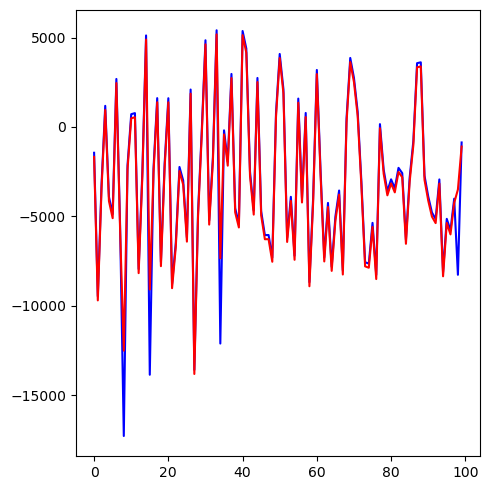

In [ ]:
plt.figure()
plt.plot(year_2_wo[0:100], color = 'blue')
plt.plot(year_2_with[0:100], color = 'red')

In [ ]:
np.mean(year_2_wo), np.mean(year_2_with)

(-2538.672798908039, -2560.7727989080395)

In [ ]:
# plot the summary 
## NEED TO MODIFY THIS TO REMOVE THE PAYOUT PART
def policy_outputter(policy, threshold_values, payout = 1000):
    # first calculate the expected value = 0 premium value for each threshold_values, the payout, and the policy
    prems = premium_calculator(policy, threshold_values = threshold_values, payout = payout)
    # now we print out the plots and the other values
    for i in range(len(threshold_values)): 
        for amount_i in range(5, 10):
            sim_output = insurance_sim_rain(10000, 10, lin_reg_india, policy(threshold_values[i], payout), insurance_premium = prems[i], insurance_amount = amount_i)
            plot_summary_trials(sim_output)
        
        



In [ ]:
threshold_values = np.linspace(600, 700, 3)
threshold_values

array([600., 650., 700.])

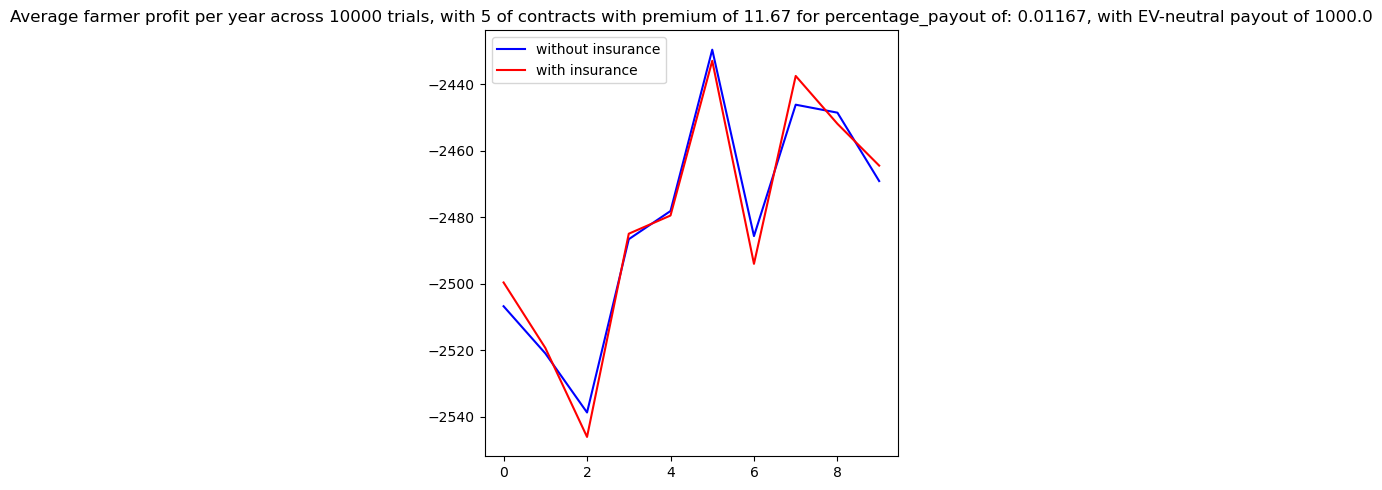

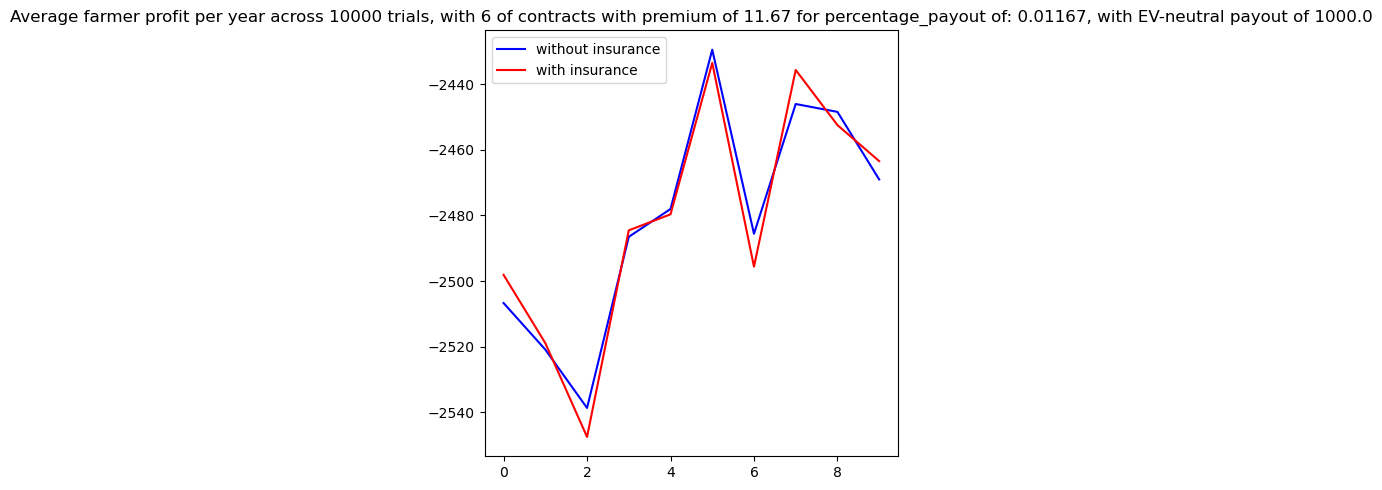

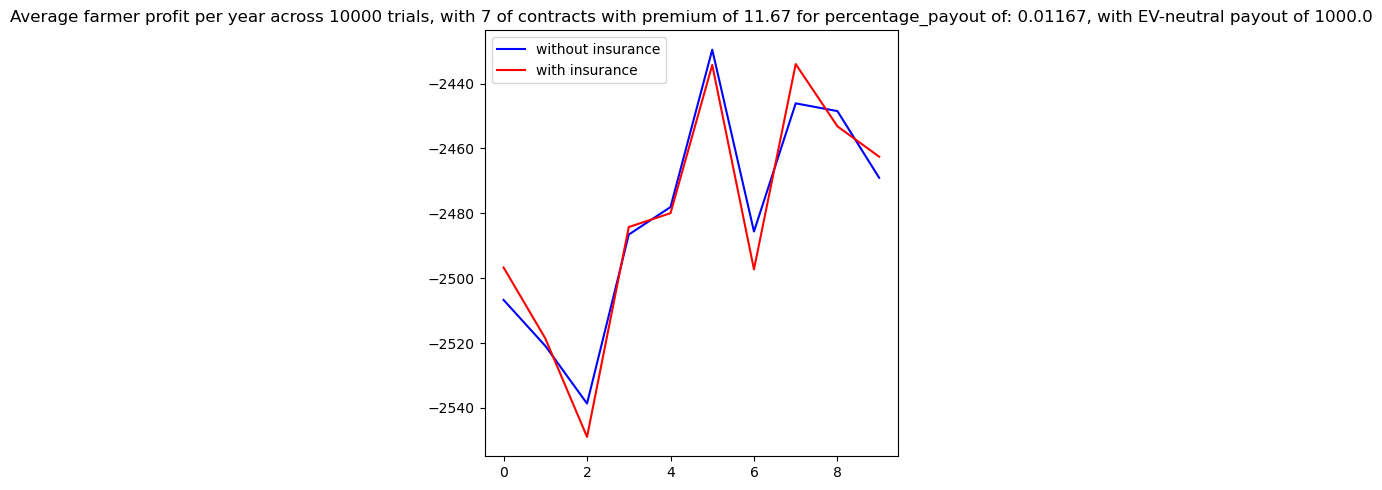

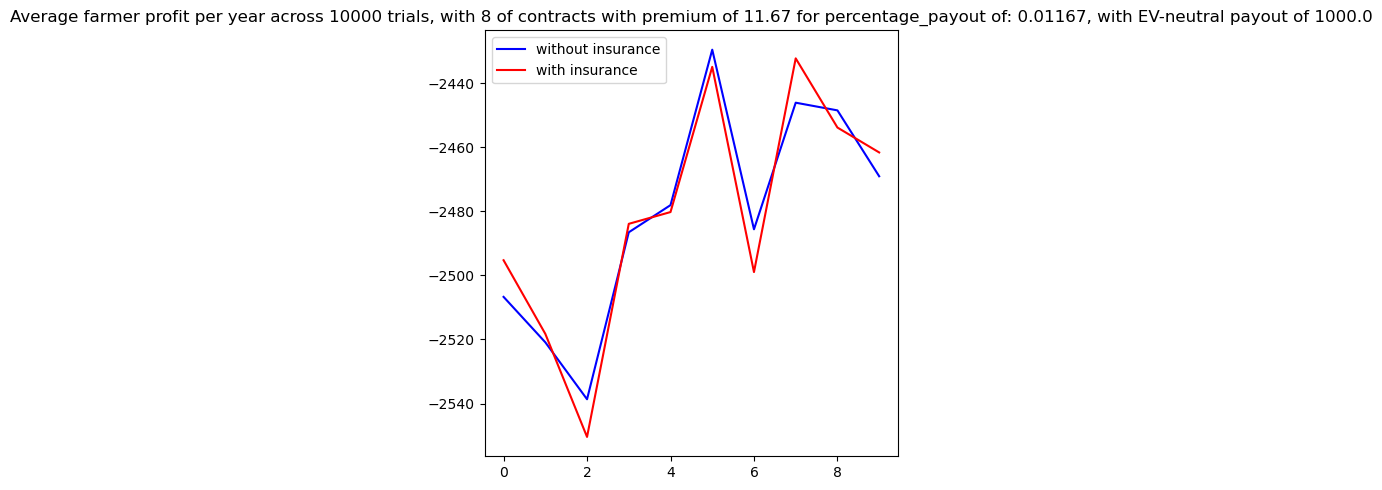

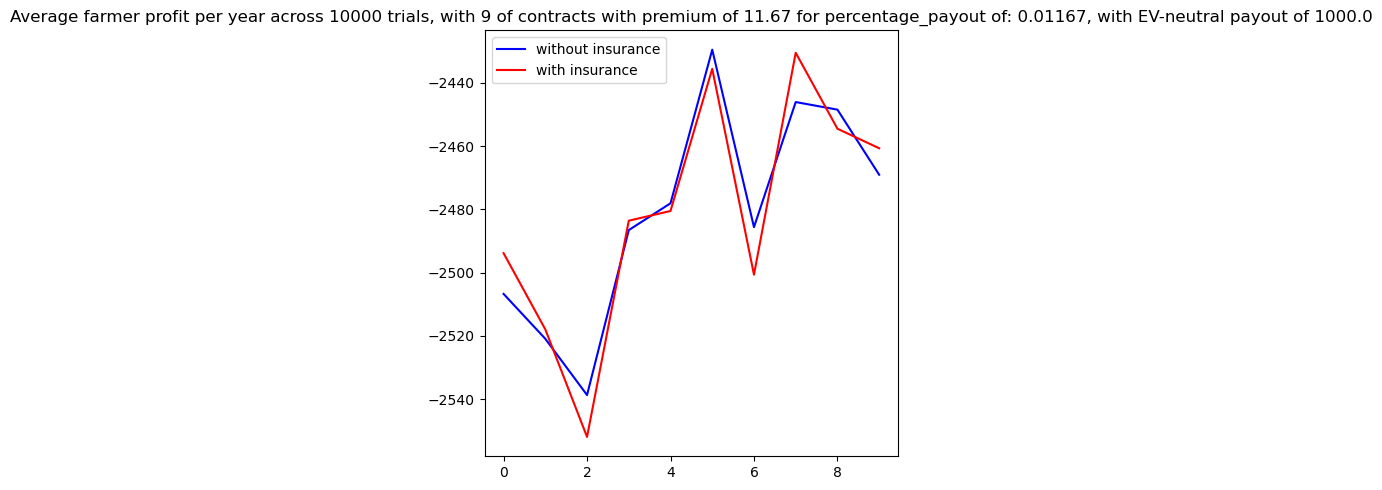

In [ ]:
policy_outputter(policy = single_lower_threshold, threshold_values = np.linspace(600, 1000, 1))

In [ ]:
# differencce between lower_threhsold and actual = x 
# payout = a * x + b 
a = 30
b = 500
lower_threshold = 900
# this policy is simple, if sum of rain in monsoon is < 600 mm
def linear_lower_threshold(threshold, payout, a=30, b=50):
    def payout_function(rain2darray): 

        payout_list = [((a*(threshold - np.sum(year[6:]))) + b) if np.sum(year[6:]) < threshold else 0 for year in rain2darray]
        return payout_list
    return payout_function
linear_lower_threshold(lower_threshold, a, b)(np.zeros((10,12)))

[450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0,
 450050.0]

In [ ]:
premium_calculator(linear_lower_threshold, threshold_values = np.linspace(400, 800, 21))

[0.0,
 0.006161095417871109,
 0.01721932549054892,
 0.03798873664152874,
 0.07311014647812927,
 0.16894740284168377,
 0.4690423968426853,
 1.178906853943255,
 2.6238932350236475,
 5.501690280846157,
 11.008019539998998,
 21.05642819030053,
 38.61733371646867,
 67.60317309812959,
 113.69596817248035,
 183.91154337599383,
 285.80078602445974,
 426.7088527182807,
 614.5382008240692,
 855.100505800913,
 1151.877194962746]

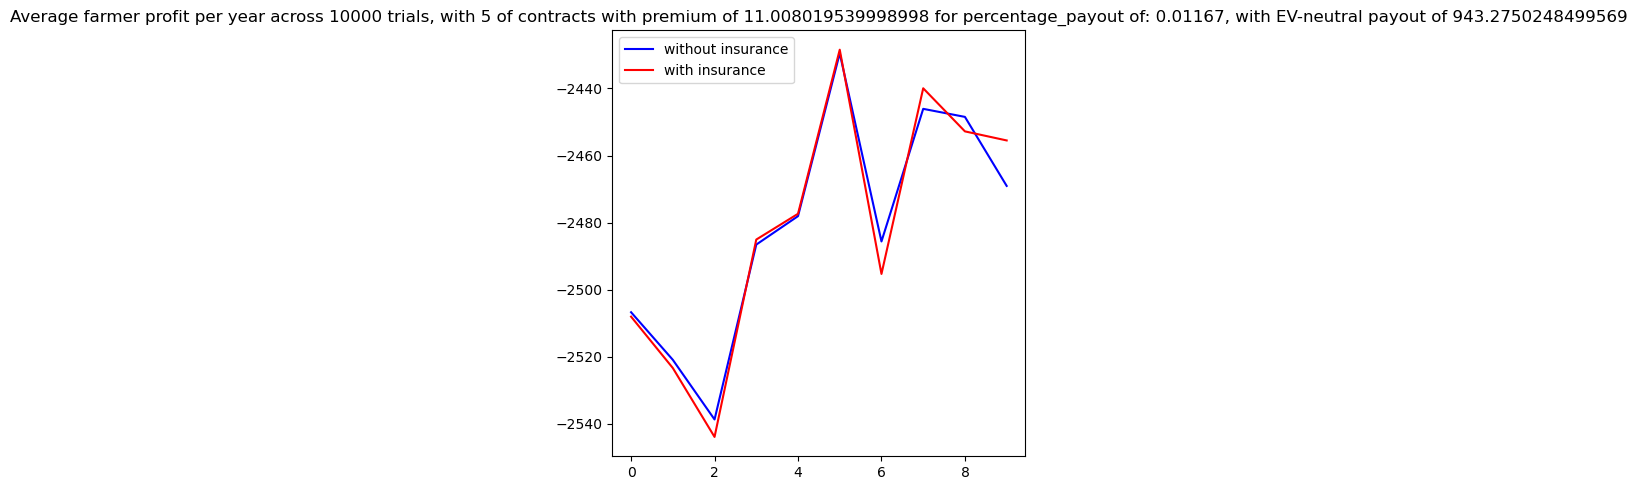

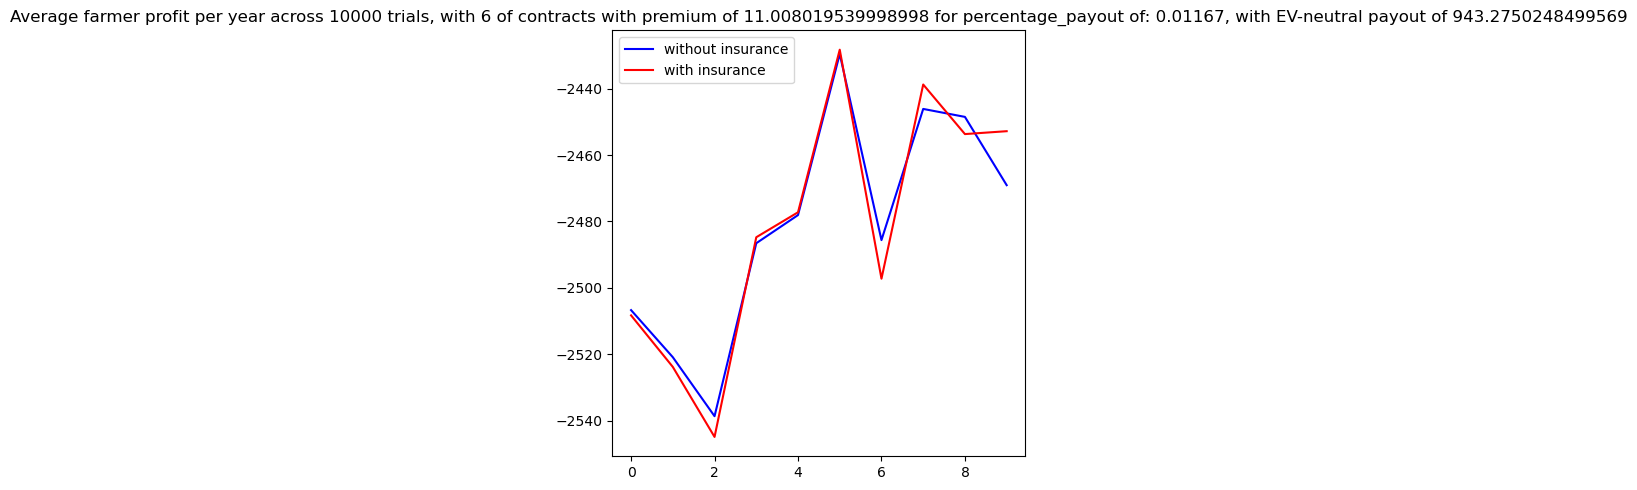

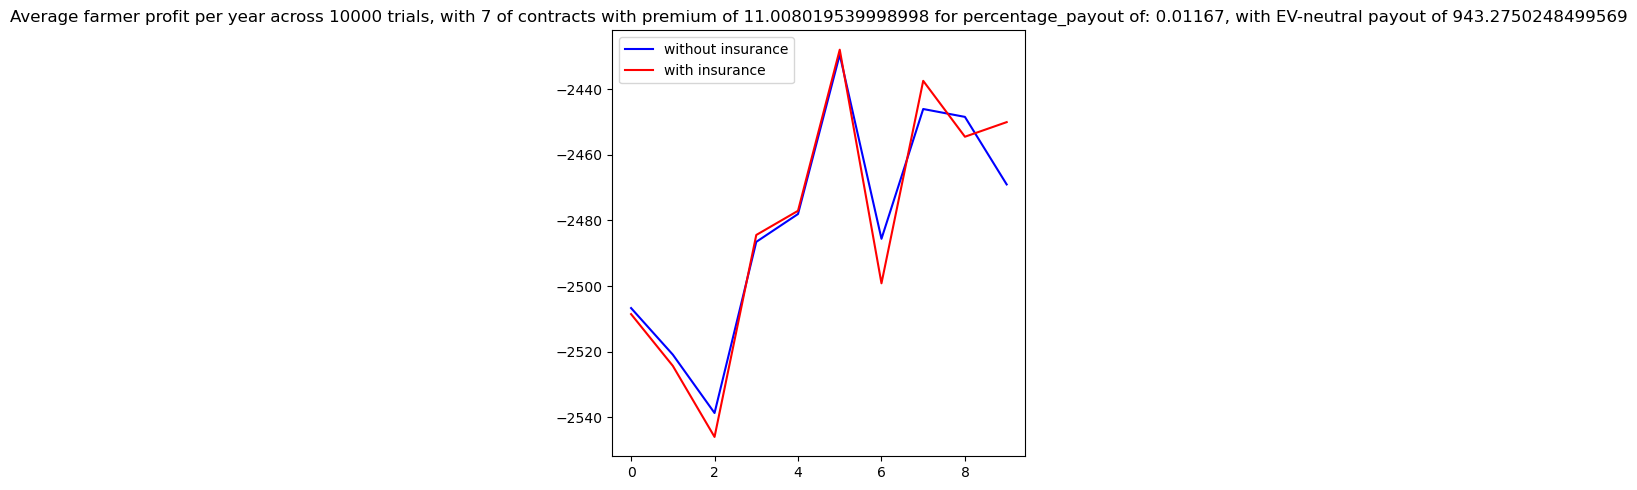

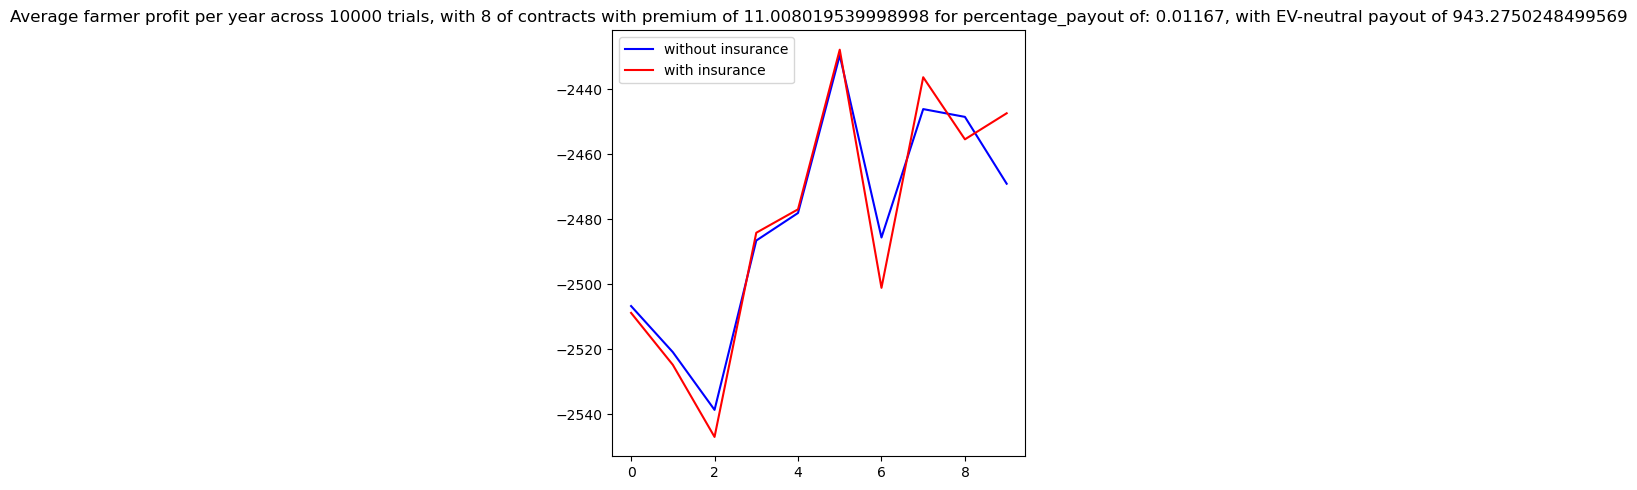

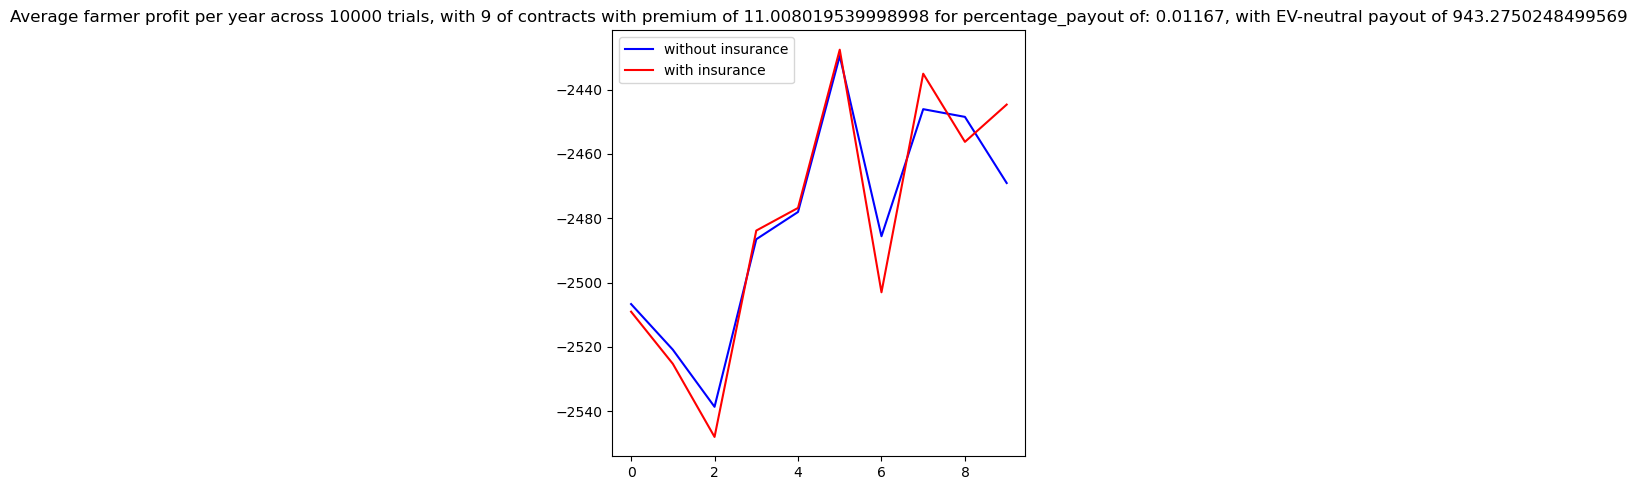

In [ ]:
policy_outputter(policy = linear_lower_threshold, threshold_values = np.linspace(600, 1000, 1))

# MARCH 9: go through 10 farmers 


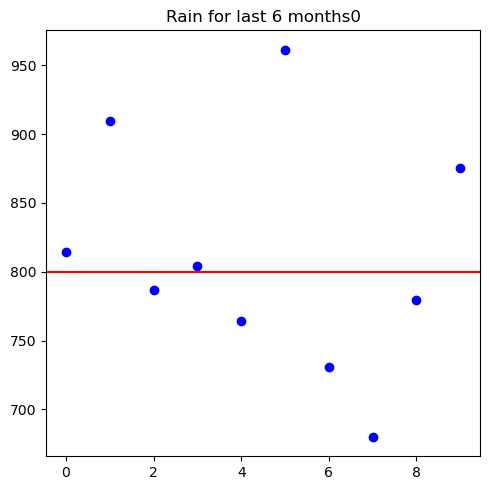

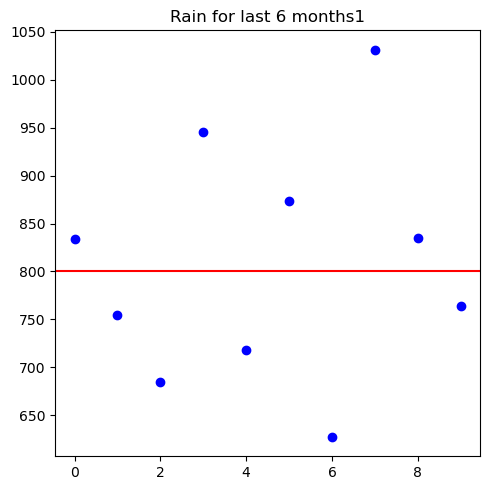

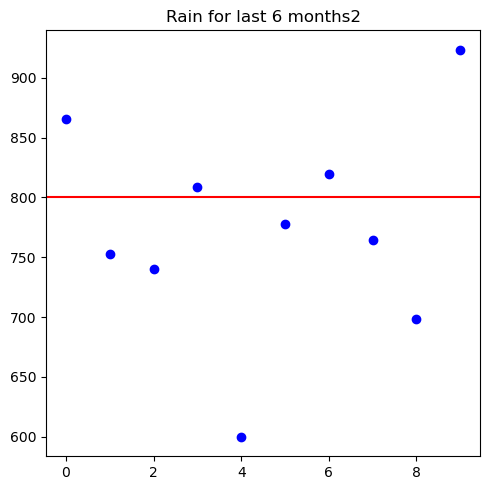

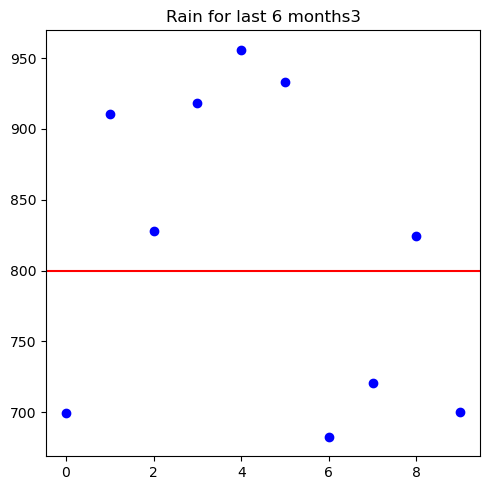

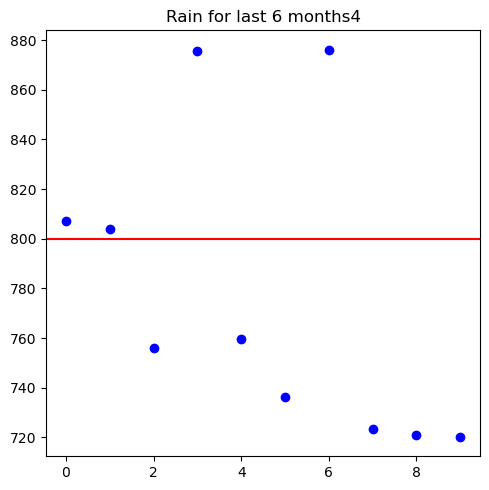

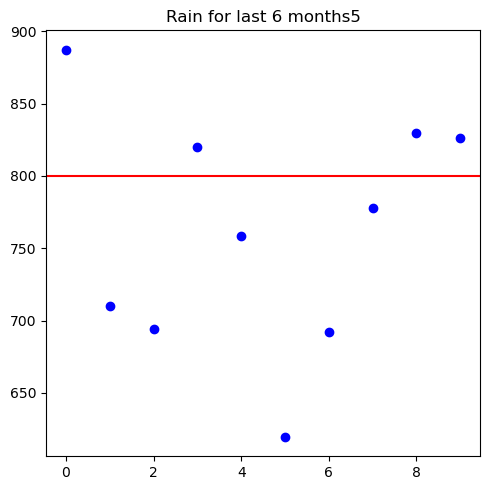

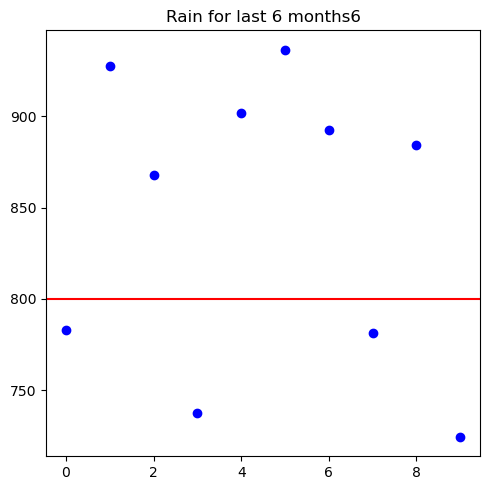

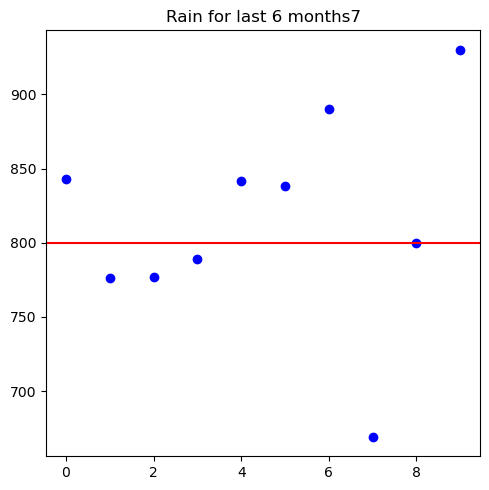

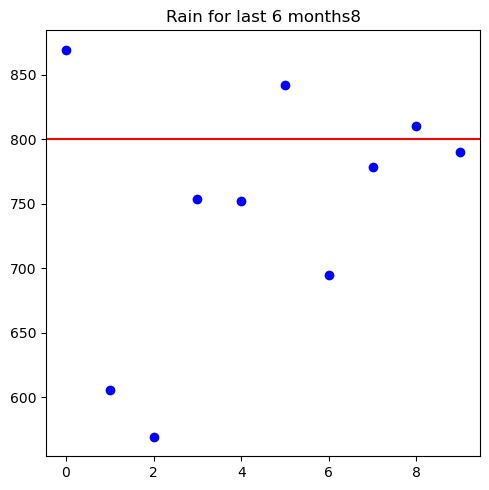

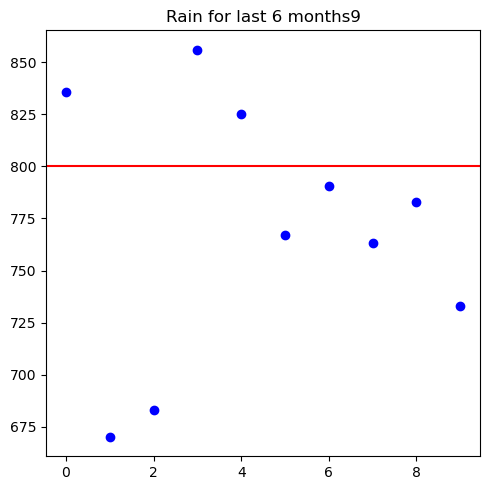

In [ ]:
for i in range(10): 
    plot_trial_insurance(single_lower_threshold_output, 800, i)

### March 9: try it on linear threshold function 
for i in range(10): 
    plot_trial_insurance(single_lower_threshold_output, i)

    

In [ ]:
threshold_values = np.linspace(800, 1000, 11)
threshold_values

array([ 800.,  820.,  840.,  860.,  880.,  900.,  920.,  940.,  960.,
        980., 1000.])

In [ ]:
prems = premium_calculator(linear_lower_threshold, [800], payout =1000)


In [ ]:
sim_output = insurance_sim_rain(10000, 10, lin_reg_india, linear_lower_threshold(800, payout = 1000), insurance_premium = prems[0], insurance_amount = 5)


Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: -28627.659534875947
Total Cash with Insurance: -46072.632580205005
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: -19311.499811648948
Total Cash with Insurance: -8100.744329469753
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: -25711.279368516025
Total Cash with Insurance: -11838.261683061424
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: 8023.330399414852
Total Cash with Insurance: 10925.91738347468
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: -37874.64128415145
Total Cash with Insurance: -36399.09073092294
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insurance: -23129.258362806562
Total Cash with Insurance: 2837.3690202133503
Insurance Company percentage payout: 53.419000000000004%
Total Cash without Insuranc

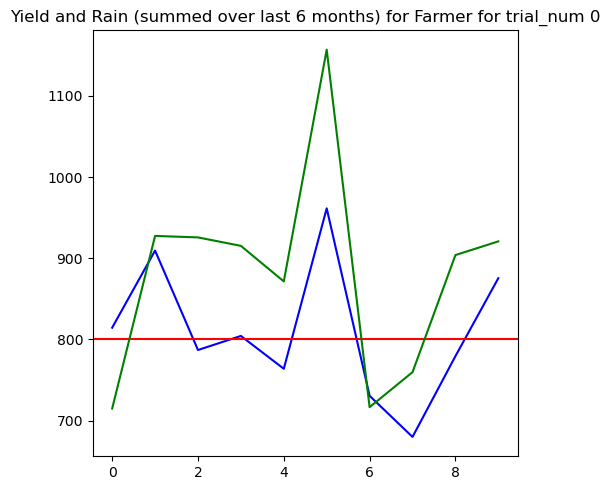

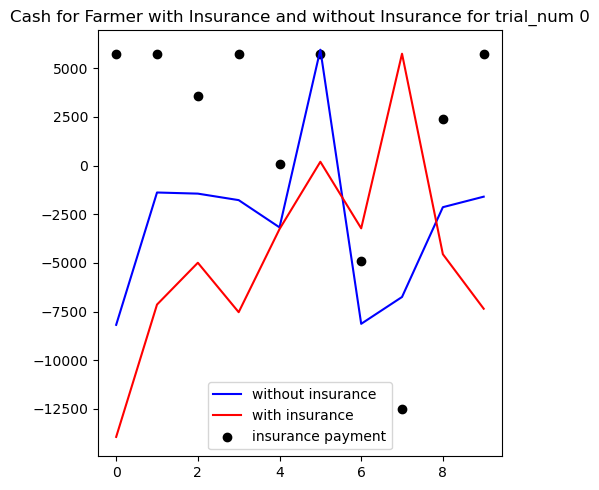

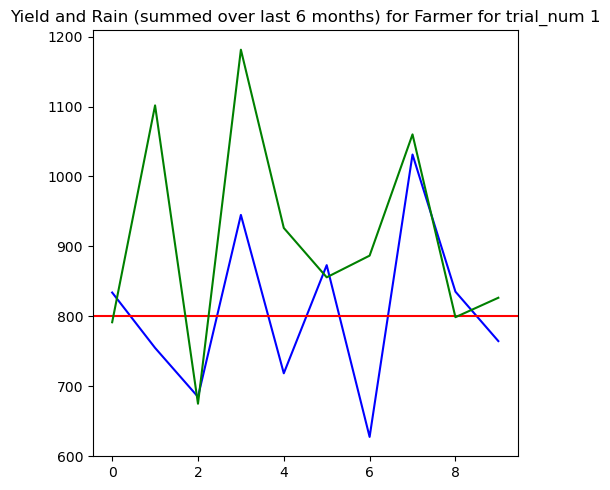

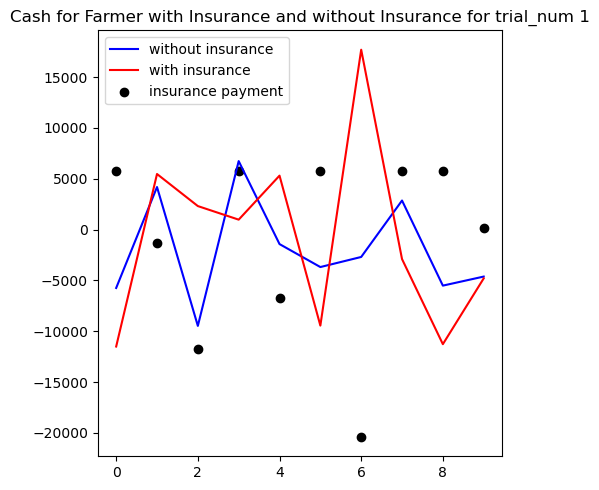

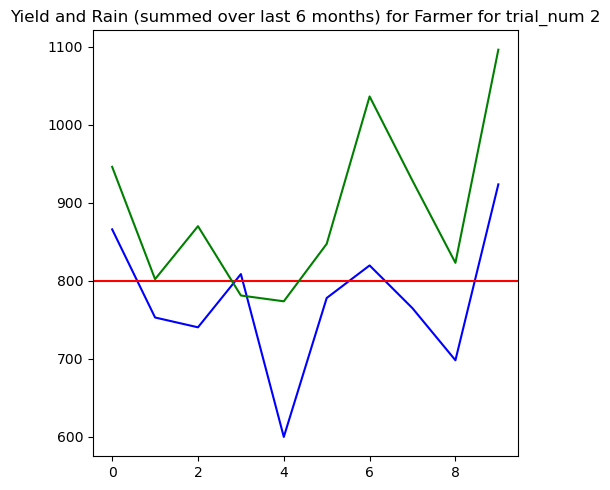

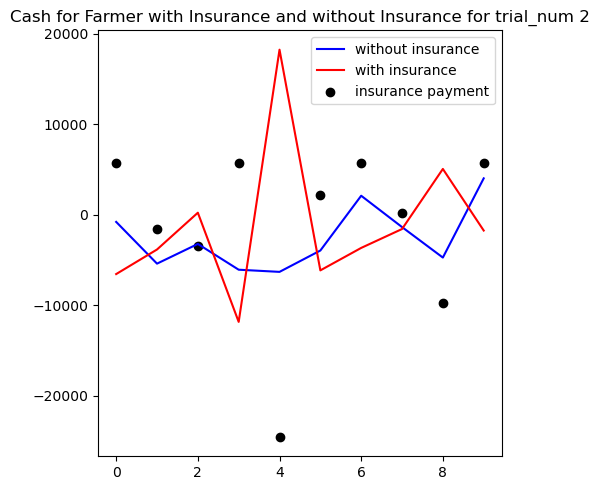

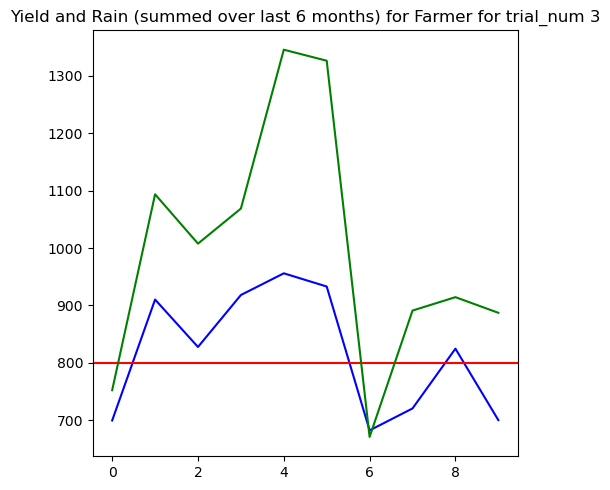

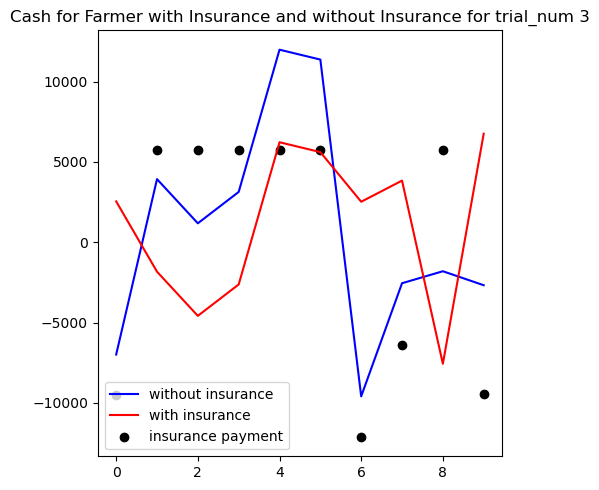

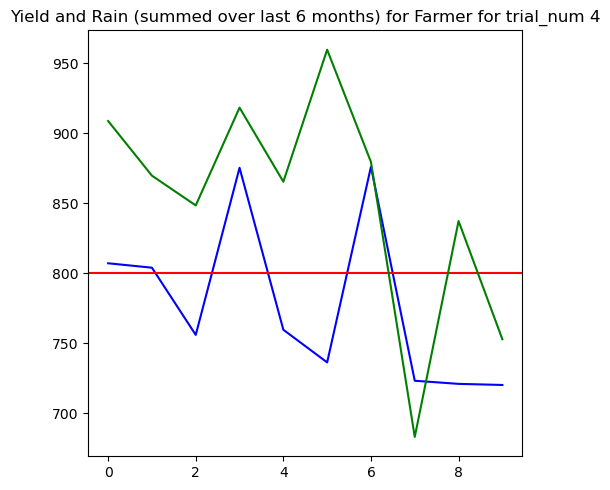

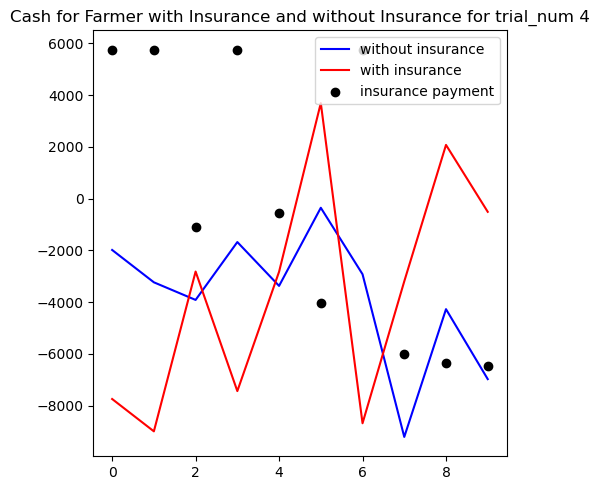

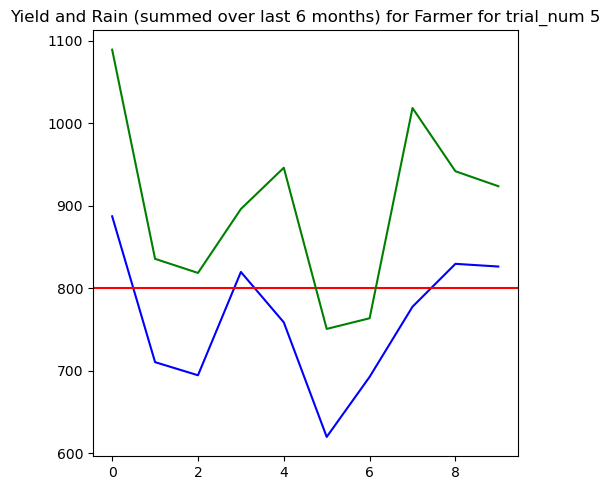

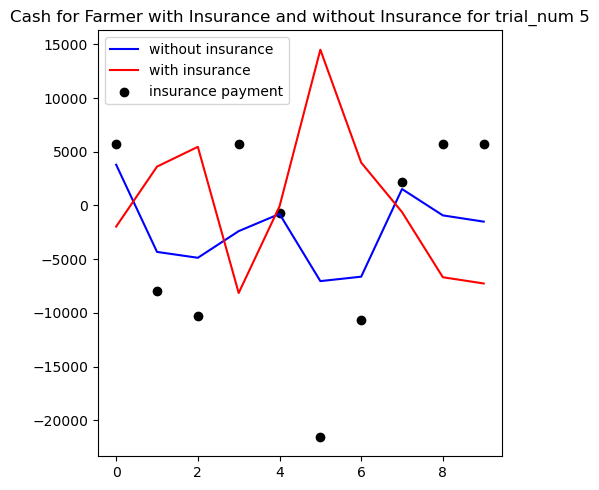

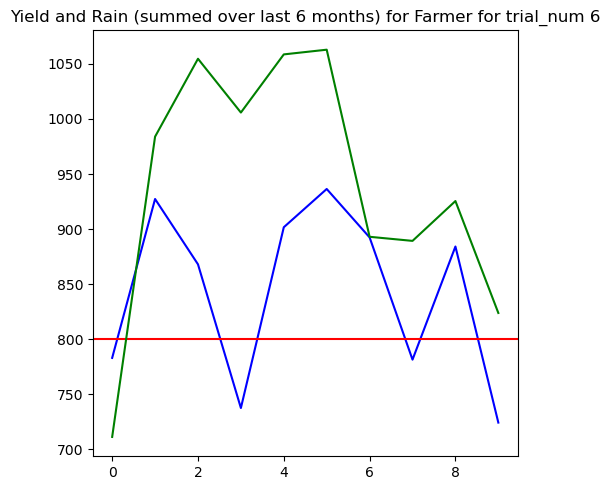

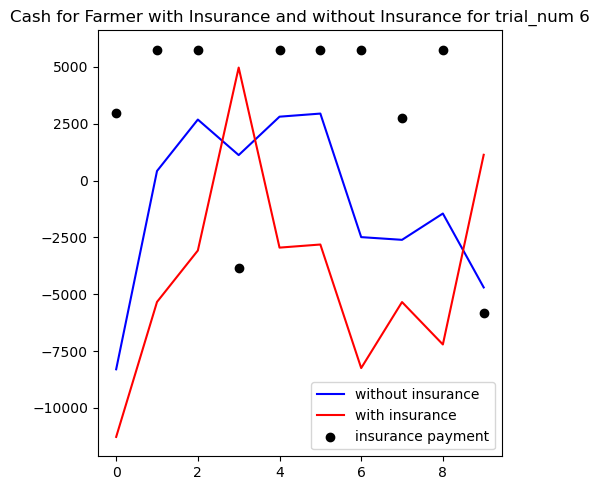

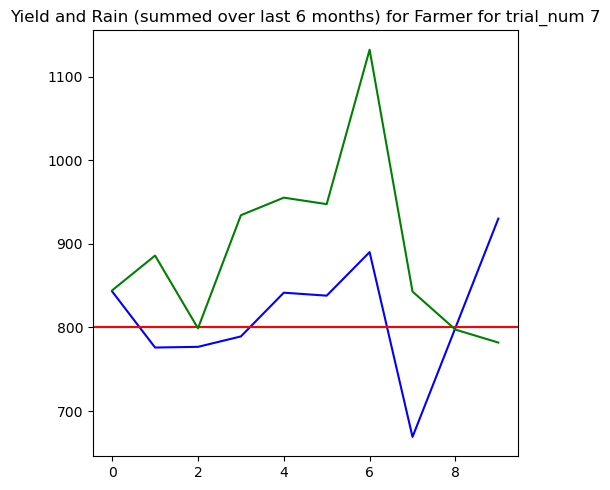

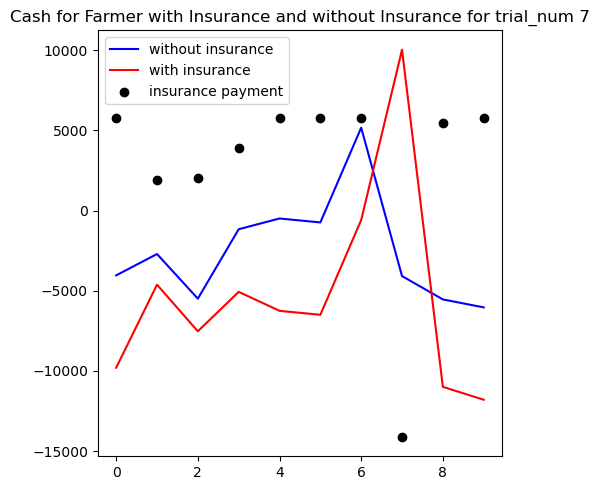

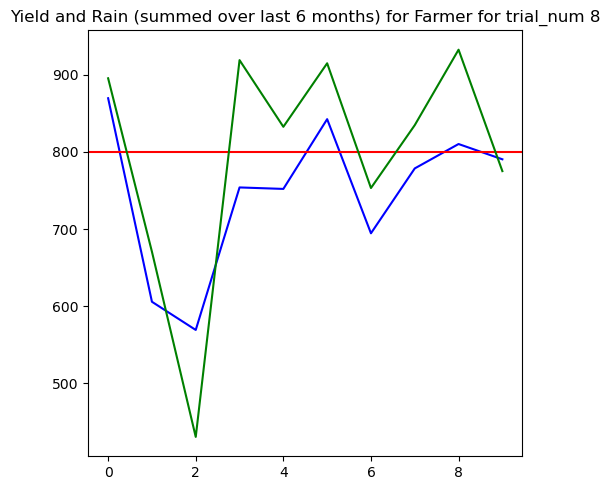

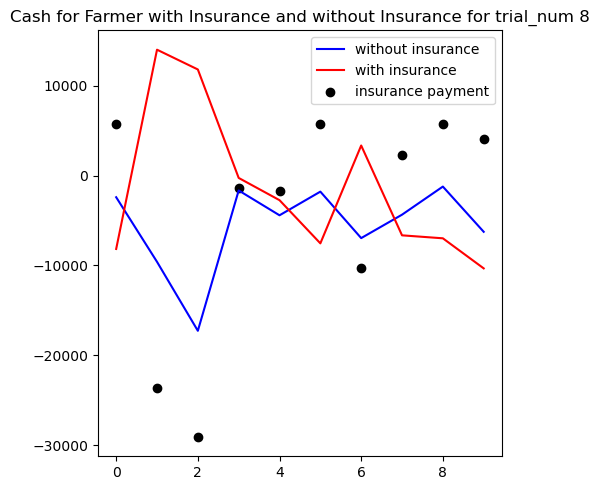

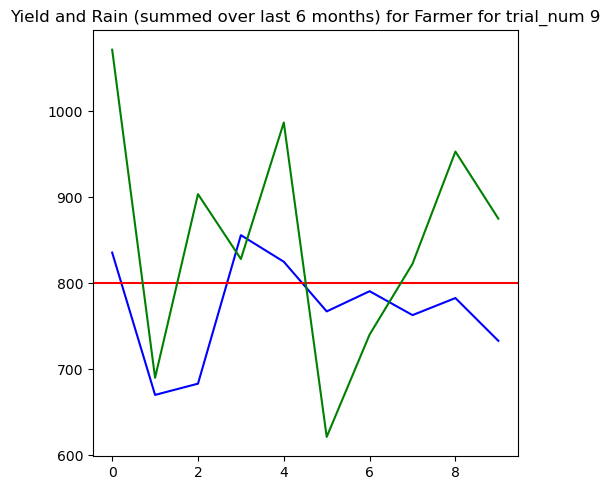

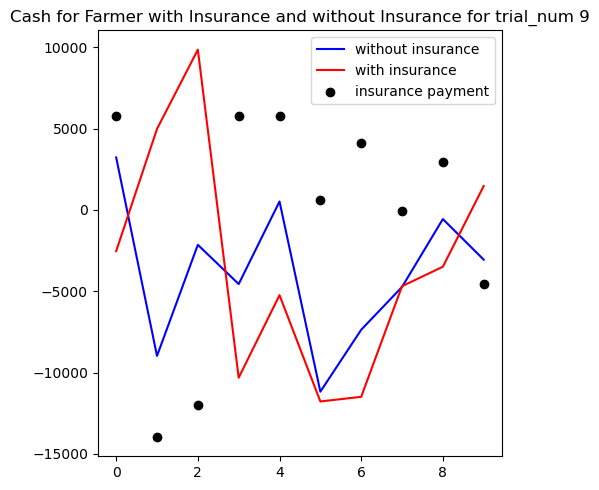

In [ ]:
for i in range(10): 
    plot_trial_insurance(sim_output, 800, i)

# Quadratic Rain to Yield

In [ ]:
# let's try encoding a quadratic rain to yield function manually using a singular year of month rain data. 
# we know that the rain data will be a vector of 12 months of data. 
# maybe let's simplify by moving it down to 4 parts (0:6, 6:8, 8:10, 10:12)

In [ ]:
rs = [0,1,2,3,4,5,6,7,8,9,10,11]
rs[0:6], rs[6:8], rs[8:10], rs[10:12]

([0, 1, 2, 3, 4, 5], [6, 7], [8, 9], [10, 11])

In [ ]:
a, b, c, d = X.T[0:6], X.T[6:8], X.T[8:10], X.T[10:12]
a, b, c, d = np.sum(a, axis = 0), np.sum(b, axis = 0), np.sum(c, axis = 0), np.sum(d, axis = 0)
X_reduced = np.array([a, b, c, d]).T

In [ ]:
a2, b2, c2, d2 = np.square(a), np.square(b), np.square(c), np.square(d)
X_reduced = np.array([a,b,c,d,a2,b2,c2,d2]).T

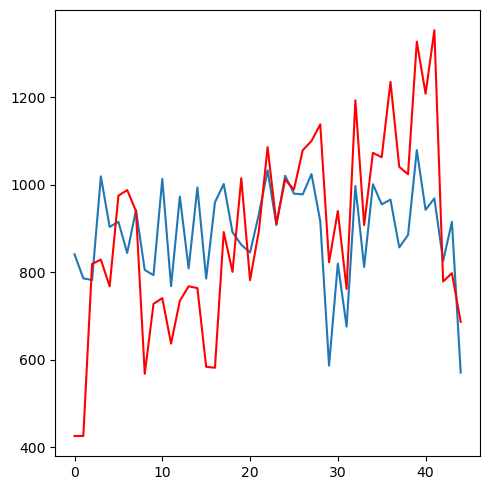

In [ ]:
# nah lets not split into train and test, just run it 
lin_reg_india = LinearRegression().fit(X_reduced, Y)
y_predict = lin_reg_india.predict(X_reduced)
plt.plot([x for x in range(len(y_predict))], y_predict)
plt.plot([x for x in range(len(y_predict))], Y, color='red')

In [ ]:
X2 = sm.add_constant(X_reduced)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2.399
Date:                Thu, 09 Mar 2023   Prob (F-statistic):             0.0661
Time:                        16:27:02   Log-Likelihood:                -300.69
No. Observations:                  45   AIC:                             611.4
Df Residuals:                      40   BIC:                             620.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        438.2297    362.449      1.209      0.2

In [ ]:
X2 = sm.add_constant(X_reduced)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2.399
Date:                Thu, 09 Mar 2023   Prob (F-statistic):             0.0661
Time:                        16:27:16   Log-Likelihood:                -300.69
No. Observations:                  45   AIC:                             611.4
Df Residuals:                      40   BIC:                             620.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        438.2297    362.449      1.209      0.2

In [ ]:
import scipy

In [ ]:
U, S, V = scipy.linalg.svd(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X)
lr = LinearRegression()

# fit and transform data

lr.fit(X_train_pca, Y)

LinearRegression()

In [ ]:
X_train_pca.shape

(45, 2)

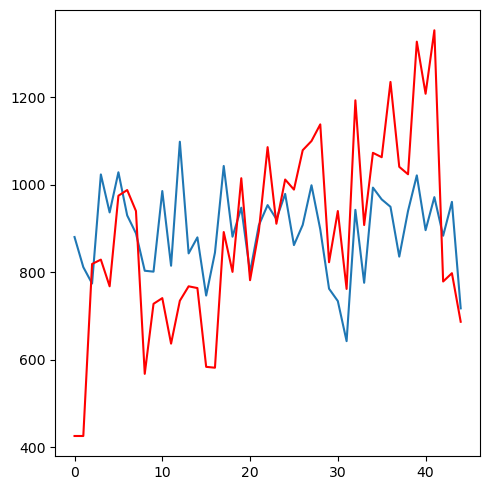

In [ ]:
y_predict = lr.predict(X_train_pca)
plt.plot([x for x in range(len(y_predict))], y_predict)
plt.plot([x for x in range(len(y_predict))], Y, color='red')

In [ ]:
import statsmodels.api as sm
from scipy import stats

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X)
X2 = sm.add_constant(X_train_pca)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.334
Date:                Thu, 09 Mar 2023   Prob (F-statistic):            0.00862
Time:                        16:17:43   Log-Likelihood:                -300.43
No. Observations:                  45   AIC:                             606.9
Df Residuals:                      42   BIC:                             612.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        893.1333     29.623     30.150      0.0

In [ ]:
for i in range(12): 
    pca = PCA(n_components=i + 1)
    X_train_pca = pca.fit_transform(X)
    X2 = sm.add_constant(X_train_pca)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     6.297
Date:                Thu, 09 Mar 2023   Prob (F-statistic):             0.0159
Time:                        16:18:27   Log-Likelihood:                -302.45
No. Observations:                  45   AIC:                             608.9
Df Residuals:                      43   BIC:                             612.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        893.1333     30.619     29.169      0.0

In [ ]:
X_train = X.T[6:].T
X2 = sm.add_constant(X_train)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1.883
Date:                Thu, 09 Mar 2023   Prob (F-statistic):              0.109
Time:                        16:28:47   Log-Likelihood:                -299.67
No. Observations:                  45   AIC:                             613.3
Df Residuals:                      38   BIC:                             626.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        326.4376    323.277      1.010      0.3

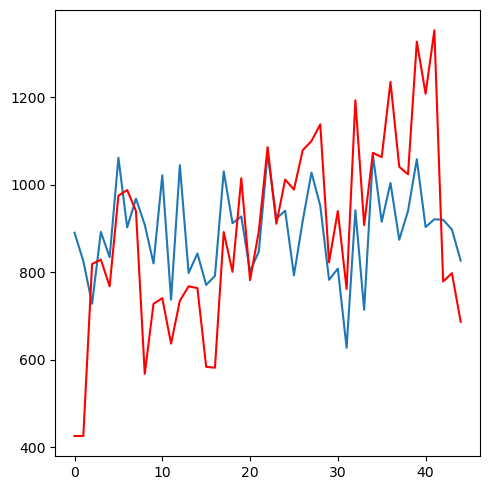

In [ ]:
# nah lets not split into train and test, just run it 
X_reduced = X.T[6:].T
lin_reg_india = LinearRegression().fit(X_reduced, Y)
y_predict = lin_reg_india.predict(X_reduced)
plt.plot([x for x in range(len(y_predict))], y_predict)
plt.plot([x for x in range(len(y_predict))], Y, color='red')

[2000]